## APS PYTHON PARA CIÊNCIA DE DADOS
Alexandre Wever

Arthur Tamm

Tomás Alessi

Victória de Oliveira Farias


Base de dados : Adult Census Income

Link : https://www.kaggle.com/datasets/uciml/adult-census-income 

O conjunto de dados escolhido para analise é o **Adult Census Income**, amplamente utilizado em estudos e competições de aprendizado de máquina. Ele contém informações demográficas e ocupacionais de adultos nos Estados Unidos, extraídas do Censo de 1994. Cada registro representa um indivíduo, com variáveis como idade, escolaridade, ocupação, horas trabalhadas por semana e outras características socioeconômicas.  

O objetivo principal da análise é **compreender os fatores que influenciam a faixa de renda** de um indivíduo, buscando identificar padrões e relações entre as variáveis. O relatório será desenvolvido integrando explicações teóricas, código executável, visualizações e interpretações. 

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("adult.csv")
print(df.shape[0], "linhas e", df.shape[1], "colunas")
df.head()

32561 linhas e 15 colunas


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


O dataset contém informações demográficas e de emprego de adultos nos EUA, com o objetivo de prever se o indivíduo ganha mais de 50 mil dólares anuais (income).

Principais colunas:

age – idade

workclass – tipo de emprego

education – nível de escolaridade

marital-status – estado civil

occupation – ocupação

relationship – relação familiar

race, sex – dados demográficos

hours-per-week – horas trabalhadas por semana

capital.gain – ganhos de capital 

capital.loss – perdas de capital 

native-country – país de origem

income – variável alvo (<=50K ou >50K)

In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.isna().sum()
# Verificacao de valores nulos

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Observação importante: A verificação acima mostra 0 valores nulos em todas as colunas. No entanto, isso não significa que não existam dados ausentes no dataset.

Em muitos datasets, especialmente os provenientes do UCI Machine Learning Repository, os valores ausentes são codificados com marcadores especiais como o símbolo "?" ao invés de valores NaN nativos do Python/pandas.

Vamos verificar a presença desses marcadores e convertê-los para valores nulos apropriados:

In [12]:

# Verificando se há valores '?' no dataset
print("Colunas com valores '?':")
(df == '?').sum()[lambda x: x > 0]

Colunas com valores '?':


Series([], dtype: int64)

In [13]:
# Substitui valores '?' por NaN e refaz a contagem
df.replace('?', np.nan, inplace=True)
print("\nValores nulos após conversão:")
df.isna().sum()[lambda x: x > 0]


Valores nulos após conversão:


workclass         1836
occupation        1843
native.country     583
dtype: int64

Após a conversão, identificamos valores ausentes em três colunas:

workclass: 1.836 valores ausentes (~5,6% dos dados)
occupation: 1.843 valores ausentes (~5,7% dos dados)
native.country: 583 valores ausentes (~1,8% dos dados)

## Tratamento de Valores Ausentes

Vamos investigar se as linhas com valores ausentes apresentam múltiplos valores nulos simultaneamente:

In [14]:
# Verificando co-ocorrência de valores ausentes
print("Linhas com valores ausentes em workclass E occupation:")
both_missing = (df['workclass'].isna() & df['occupation'].isna()).sum()
print(f"{both_missing:,} linhas (~{100*both_missing/len(df):.1f}% do total)")

print(f"\nTotal de linhas com pelo menos 1 valor ausente: {df.isna().any(axis=1).sum():,}")
print(f"Percentual do dataset: {100*df.isna().any(axis=1).sum()/len(df):.1f}%")

Linhas com valores ausentes em workclass E occupation:
1,836 linhas (~5.6% do total)

Total de linhas com pelo menos 1 valor ausente: 2,399
Percentual do dataset: 7.4%


**Decisão**: Como workclass e occupation são variáveis categóricas fundamentais para a análise de renda, e não há forma confiável de imputar essas informações (não podemos a ocupação de alguém), optamos por remover as linhas com valores ausentes.

Essa abordagem é adequada pois:

Os valores ausentes representam apenas ~7% dos dados
Mantemos ~93% do dataset (30.162 linhas), suficiente para análises robustas
Evitamos introduzir viés por imputação arbitrária

In [15]:
# Removendo linhas com valores ausentes
print(f"Dataset original: {len(df):,} linhas")
df = df.dropna()
print(f"Dataset limpo: {len(df):,} linhas")
print(f"Dados mantidos: {100*len(df)/32561:.1f}%")

Dataset original: 32,561 linhas
Dataset limpo: 30,162 linhas
Dados mantidos: 92.6%


In [7]:
df.groupby('income').agg({'age':['mean'], 'hours.per.week':['mean'], 'education.num':['mean']})

,age,hours.per.week,education.num
,mean,mean,mean
income,,,
<=50K,36.783738,38.840210,9.595065
>50K,44.249841,45.473026,11.611657


Realizando um agrupamento por faixa de renda, podemos observar as médias de idade, horas trabalhadas por semana e nível educacional para cada categoria de renda (separação feita entre mais de 50 mil dólares e 50 mil dólares ou menos). Observa-se que indivíduos com renda superior a 50 mil dólares tendem a ser mais velhos, trabalhar mais horas por semana e possuir um nível educacional mais elevado em comparação com aqueles que ganham 50 mil dólares ou menos.

In [8]:
df.groupby(['income', 'race']).size().reset_index(name='count')


,income,race,count
0,<=50K,Amer-Indian-Eskimo,275
1,<=50K,Asian-Pac-Islander,763
2,<=50K,Black,2737
3,<=50K,Other,246
4,<=50K,White,20699
5,>50K,Amer-Indian-Eskimo,36
6,>50K,Asian-Pac-Islander,276
7,>50K,Black,387
8,>50K,Other,25
9,>50K,White,7117


In [9]:
df.groupby(['income', 'sex']).size().reset_index(name='count')


,income,sex,count
0,<=50K,Female,9592
1,<=50K,Male,15128
2,>50K,Female,1179
3,>50K,Male,6662


Oberva-se que não há uma discrepância significativa na distribuição de renda variando o sexo, mas há uma diferença notável quando se considera a raça. Indivíduos de determinadas raças apresentam uma maior proporção de renda superior a 50 mil dólares anuais em comparação com outras raças. Essa análise sugere que fatores demográficos, como raça, podem influenciar a distribuição de renda dentro do conjunto de dados.

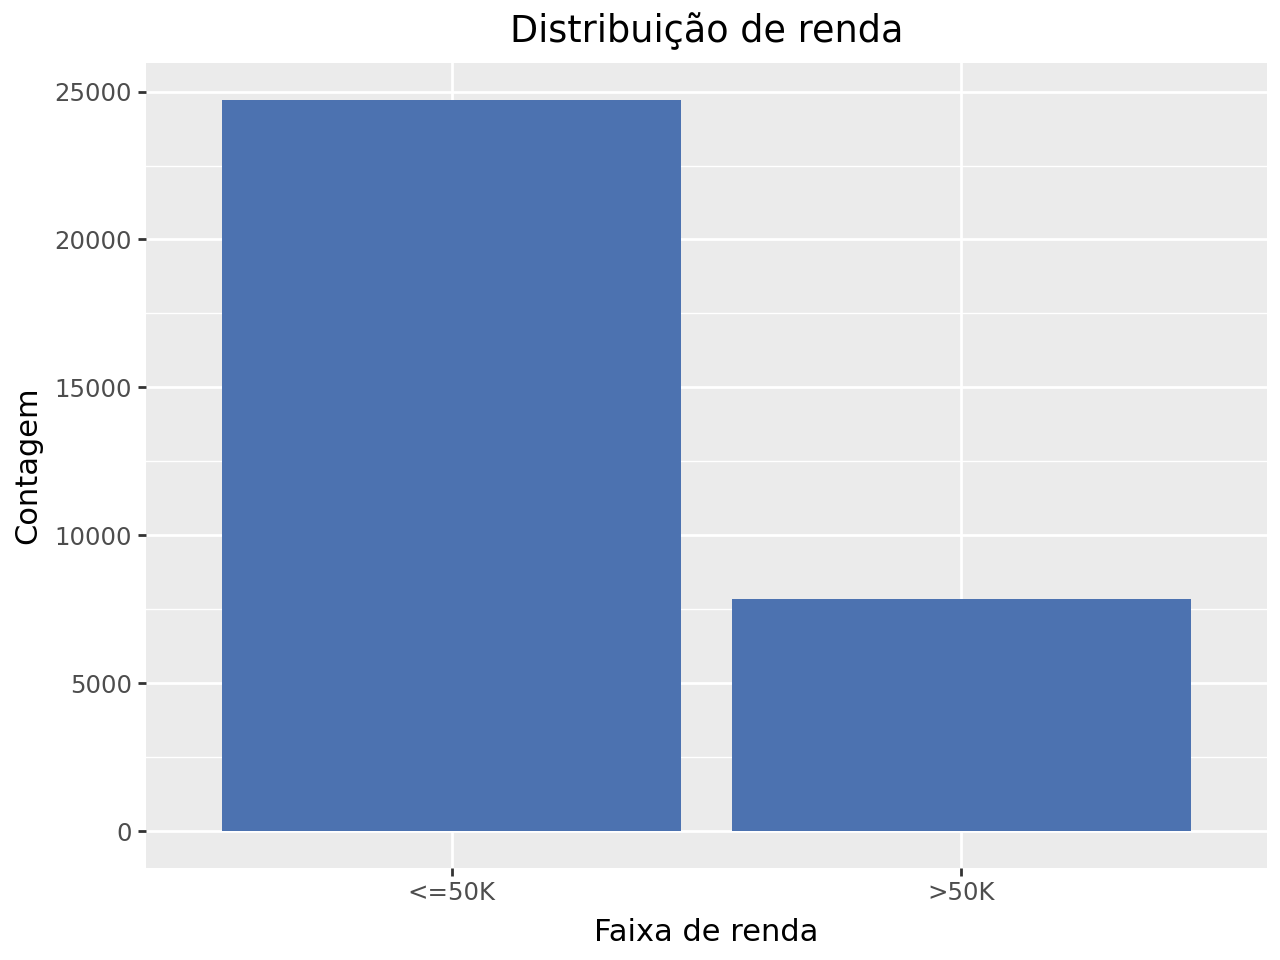

In [10]:
(ggplot(df, aes(x='income')) +
 geom_bar(fill='#4C72B0') +
 labs(title='Distribuição de renda', x='Faixa de renda', y='Contagem'))

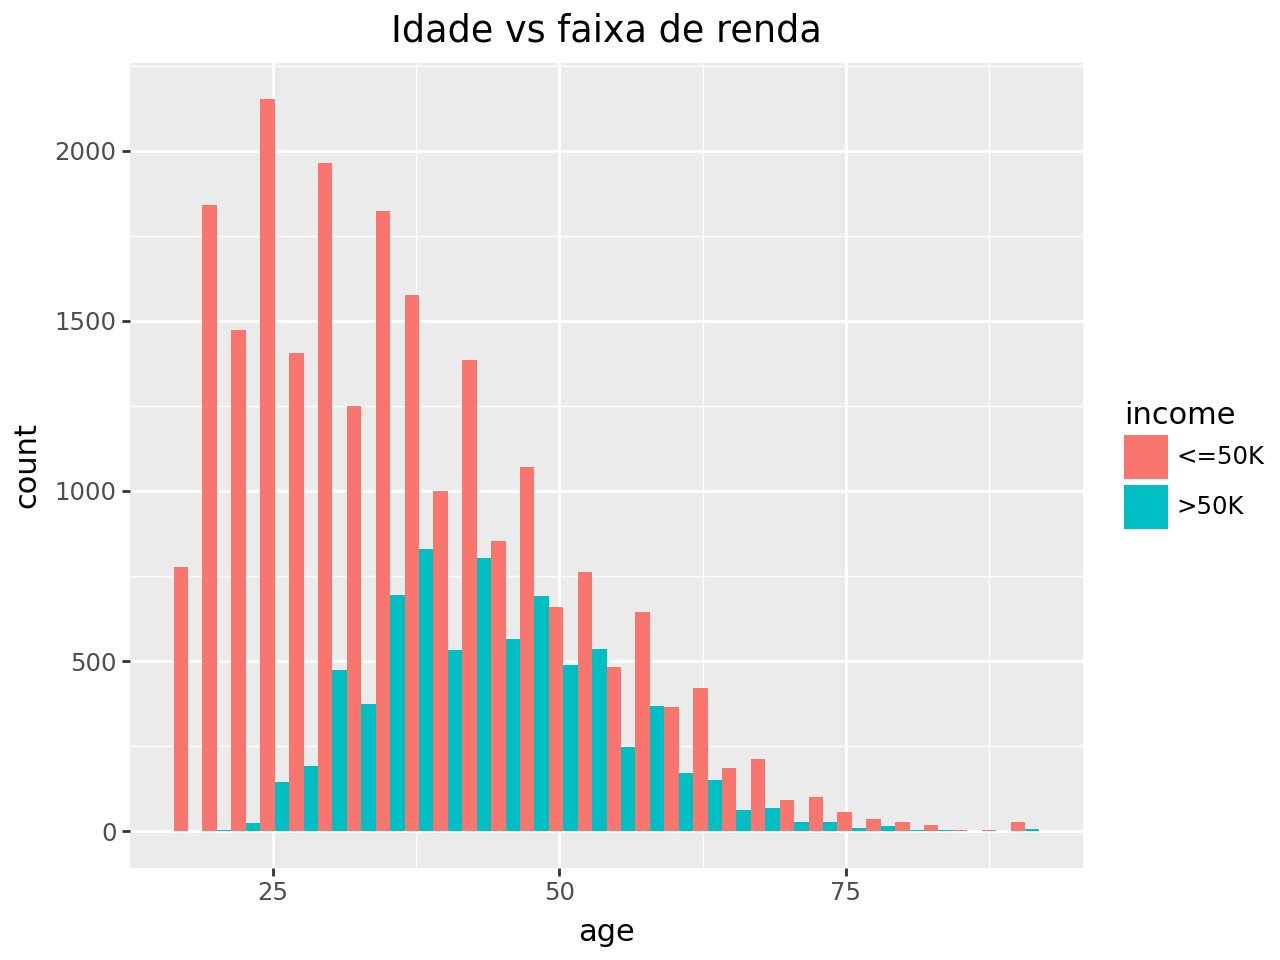

In [16]:

(ggplot(df, aes(x='age', fill='income')) +
 geom_histogram(bins=30, position='dodge') +
 labs(title='Idade vs faixa de renda'))

A partir do primeiro gráfico, observa-se que a maioria dos indivíduos do conjunto de dados pertence à faixa de renda de até 50 mil dólares anuais, o que indica um de classes, comum em dados socioeconômicos.

O segundo gráfico mostra a distribuição da idade em relação à faixa de renda. Nota-se que a concentração de indivíduos é maior entre **25 e 45 anos**, faixa etária em que há predominância de pessoas com renda menor que 50 mil dólares. Entretanto, à medida que a idade aumenta, a proporção de indivíduos com renda superior a 50 mil dólares cresce, alcançando um pico por volta dos **40 a 50 anos**.  

A partir dos 60 anos, observa-se uma queda significativa na contagem de registros, o que pode estar relacionado à aposentadoria ou redução da quantidade de trabalho.  

Essas evidências sugerem que a idade está associada à renda até certo ponto, e que essa relação pode não ser linear.


## Análise Exploratória Aprofundada




### 1. Educação e Renda

A educação é frequentemente citada como um dos fatores mais importantes na determinação da renda. Vamos explorar como diferentes níveis educacionais se relacionam com a faixa de renda.


In [ ]:
# Análise da distribuição de renda por nível educacional
education_income = (df
                    .groupby(['education', 'income'])
                    .size()
                    .reset_index(name='count'))

education_income.head(10)


,education,income,count
0,10th,<=50K,871
1,10th,>50K,62
2,11th,<=50K,1115
3,11th,>50K,60
4,12th,<=50K,400
5,12th,>50K,33
6,1st-4th,<=50K,162
7,1st-4th,>50K,6
8,5th-6th,<=50K,317
9,5th-6th,>50K,16


In [17]:
education_rename = {
    'HS-grad': 'Ensino Médio Completo',
    'Assoc-voc': 'Técnico Profissionalizante',
    'Assoc-acdm': 'Técnico Acadêmico',
    'Some-college': 'Superior Incompleto',
    'Bachelors': 'Bacharelado',
    'Masters': 'Mestrado',
    'Doctorate': 'Doutorado',
    'Prof-school': 'Escola Profissional',
    'Preschool': 'Pré-escola',
    '1st-4th': '1ª a 4ª série',
    '5th-6th': '5ª a 6ª série',
    '7th-8th': '7ª a 8ª série',
    '9th': '9º ano',
    '10th': '10º ano (1º EM)',
    '11th': '11º ano (2º EM)',
    '12th': '12º ano (3º EM)'
}

df['education'] = df['education'].replace(education_rename)


C:\Users\Vitoria Oliveira\AppData\Local\Temp\ipykernel_4184\4126805569.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


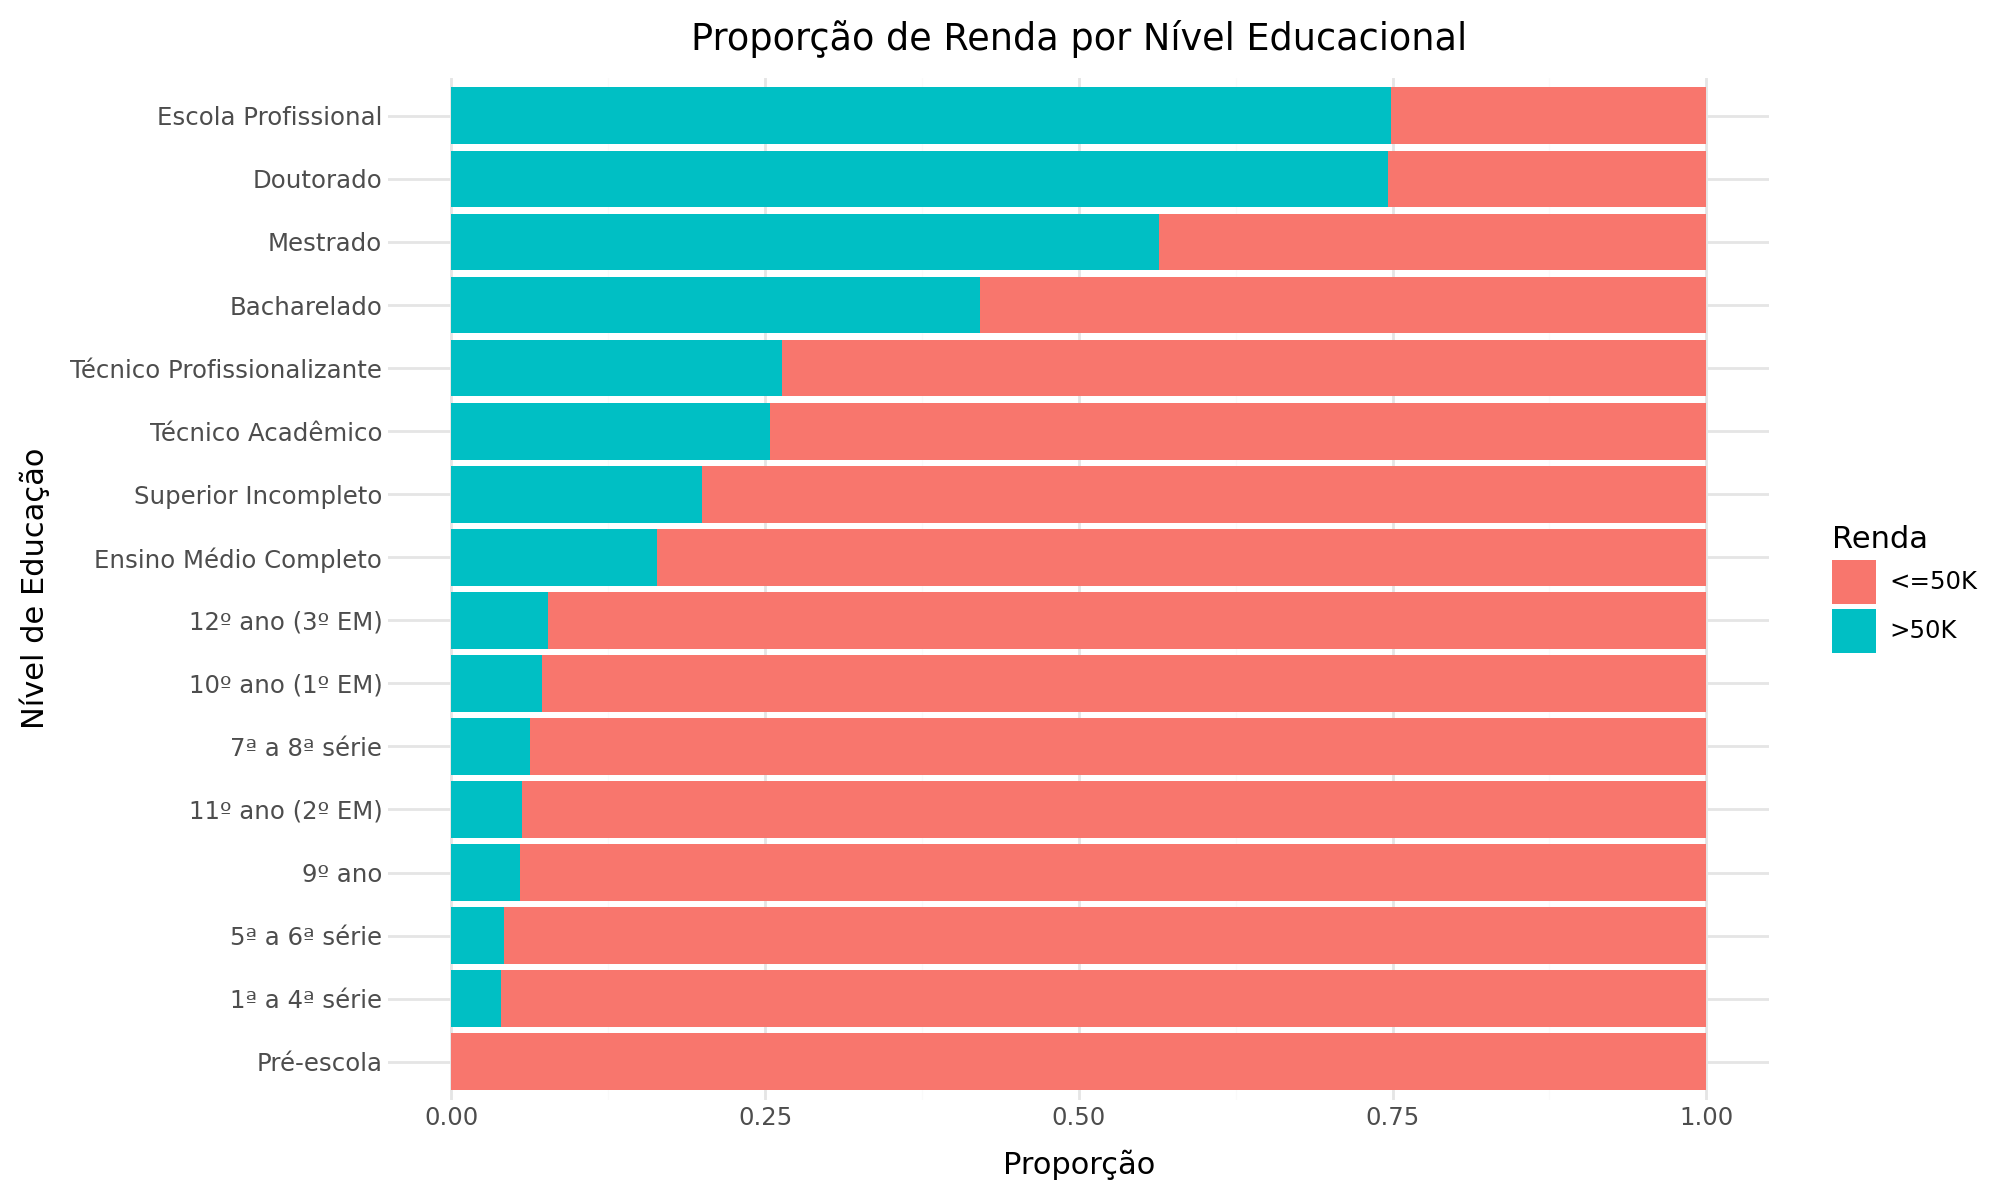

In [18]:
# Gráfico de barras empilhadas mostrando a proporção de renda por educação
# Ordenando educação pela proporção de alta renda
education_order = (df
                   .groupby('education')
                   .agg(high_income=('income', lambda x: (x == '>50K').sum()),
                        total=('income', 'count'))
                   .assign(prop=lambda x: x['high_income'] / x['total'])
                   .sort_values('prop')
                   .index.tolist())

(df
 .assign(education=lambda _: pd.Categorical(_.education, categories=education_order, ordered=True))
 .pipe(lambda _: ggplot(_, aes(x='education', fill='income')) +
           geom_bar(position='fill') +
           coord_flip() +
           labs(title='Proporção de Renda por Nível Educacional',
                x='Nível de Educação',
                y='Proporção',
                fill='Renda') +
           theme_minimal() +
           theme(figure_size=(10, 6))))

In [ ]:
# Calculando a proporção de alta renda por educação
education_prop = (df
                  .groupby('education')
                  .agg(
                      total=('income', 'count'),
                      high_income=('income', lambda x: (x == '>50K').sum())
                  )
                  .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                  .sort_values('prop_high_income', ascending=False)
                  .reset_index())

education_prop

,education,total,high_income,prop_high_income
0,Doctorate,413,306,74.092010
1,Prof-school,576,423,73.437500
2,Masters,1723,959,55.658735
3,Bachelors,5355,2221,41.475257
4,Assoc-voc,1382,361,26.121563
5,Assoc-acdm,1067,265,24.835989
6,Some-college,7291,1387,19.023454
7,HS-grad,10501,1675,15.950862
8,12th,433,33,7.621247
9,10th,933,62,6.645230


**Interpretação:**

O gráfico revela uma **relação clara entre educação e renda**. Indivíduos com nível educacional mais avançado apresentam proporções significativamente maiores de renda superior a 50 mil dólares:

- **Doctorate** e **Prof-school** (profissional/médico/advogado) lideram com as maiores proporções de alta renda, superando 70%
- **Masters** e **Bachelors** também apresentam proporções elevadas, acima de 35-40%
- Por outro lado, níveis educacionais mais básicos como **Preschool**, **1st-4th**, e **Some-HS** (ensino médio incompleto) têm proporções abaixo de 5%

Essa tendência confirma a hipótese de que a educação superior está fortemente associada a melhores oportunidades de renda


### 2. Horas Trabalhadas por Semana

Outro fator importante a ser analisado é a relação entre a quantidade de horas trabalhadas por semana e a faixa de renda. Trabalhadores que dedicam mais horas tendem a ganhar mais?


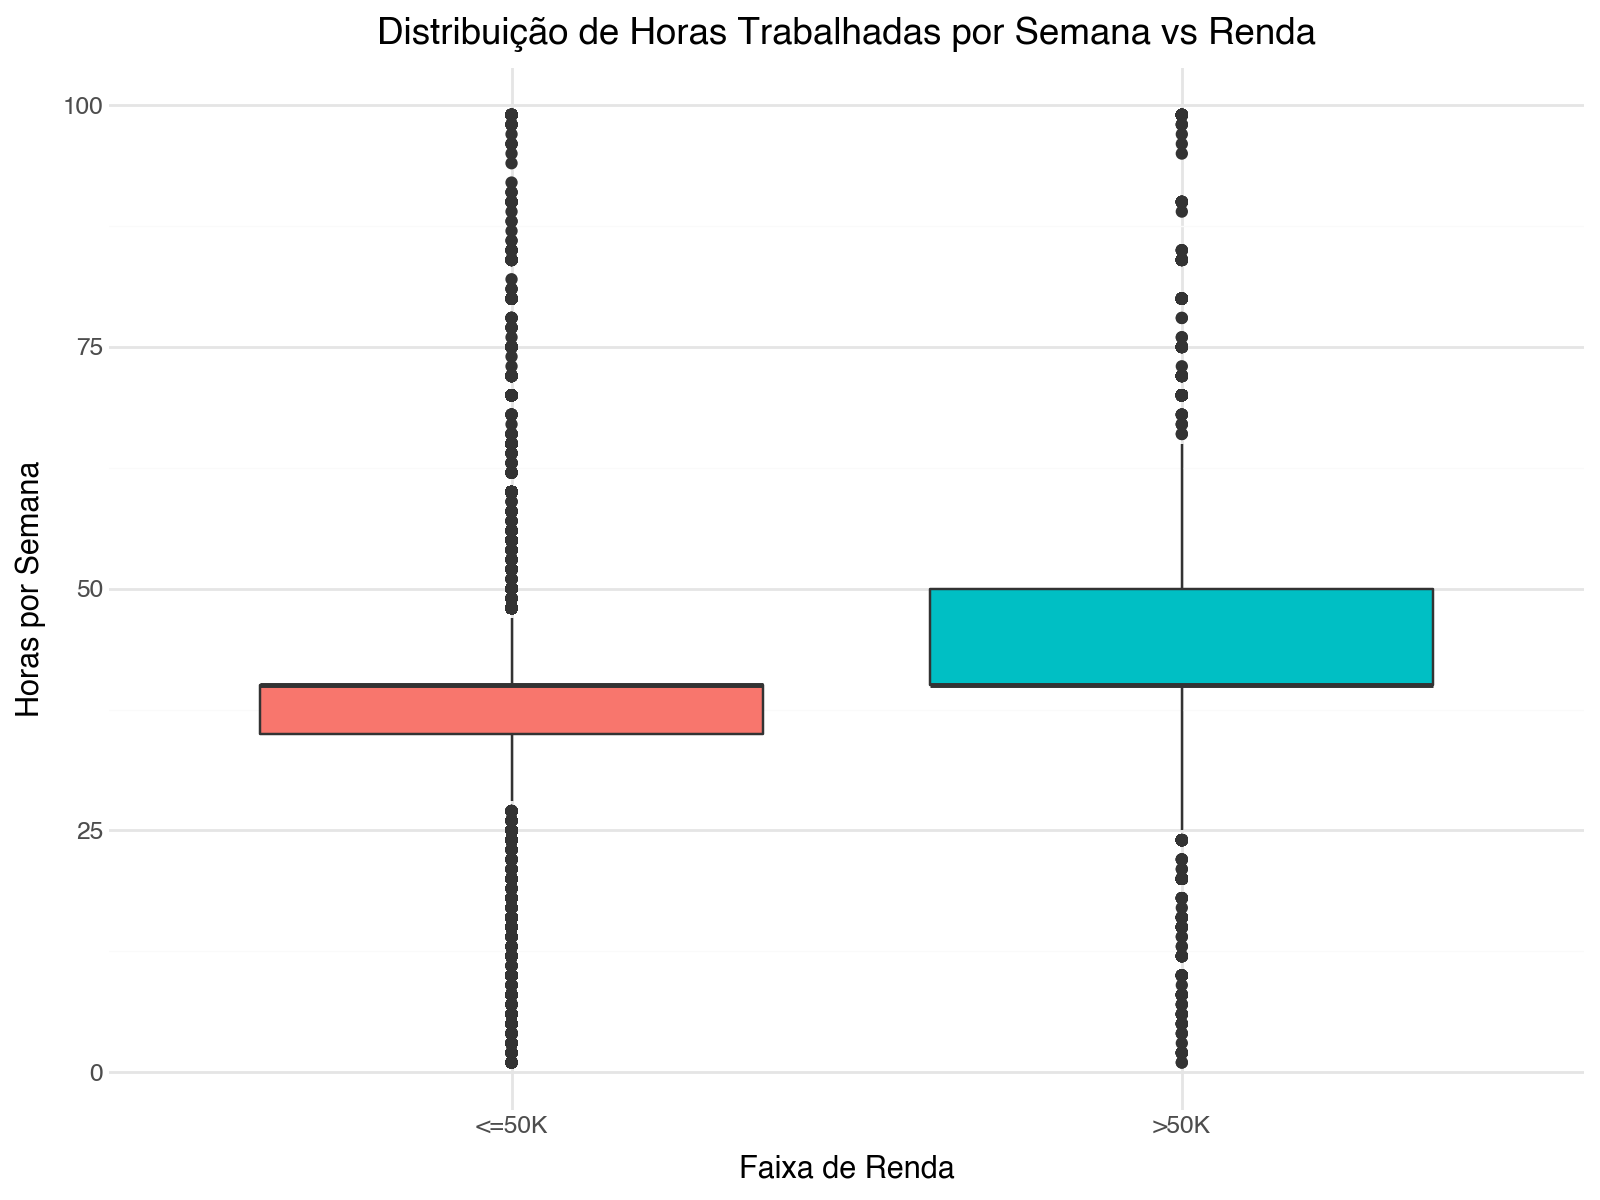

In [ ]:
# Boxplot comparando horas trabalhadas entre faixas de renda
(ggplot(df, aes(x='income', y='hours.per.week', fill='income')) +
 geom_boxplot() +
 labs(title='Distribuição de Horas Trabalhadas por Semana vs Renda',
      x='Faixa de Renda',
      y='Horas por Semana') +
 theme_minimal() +
 theme(figure_size=(8, 6), legend_position='none'))


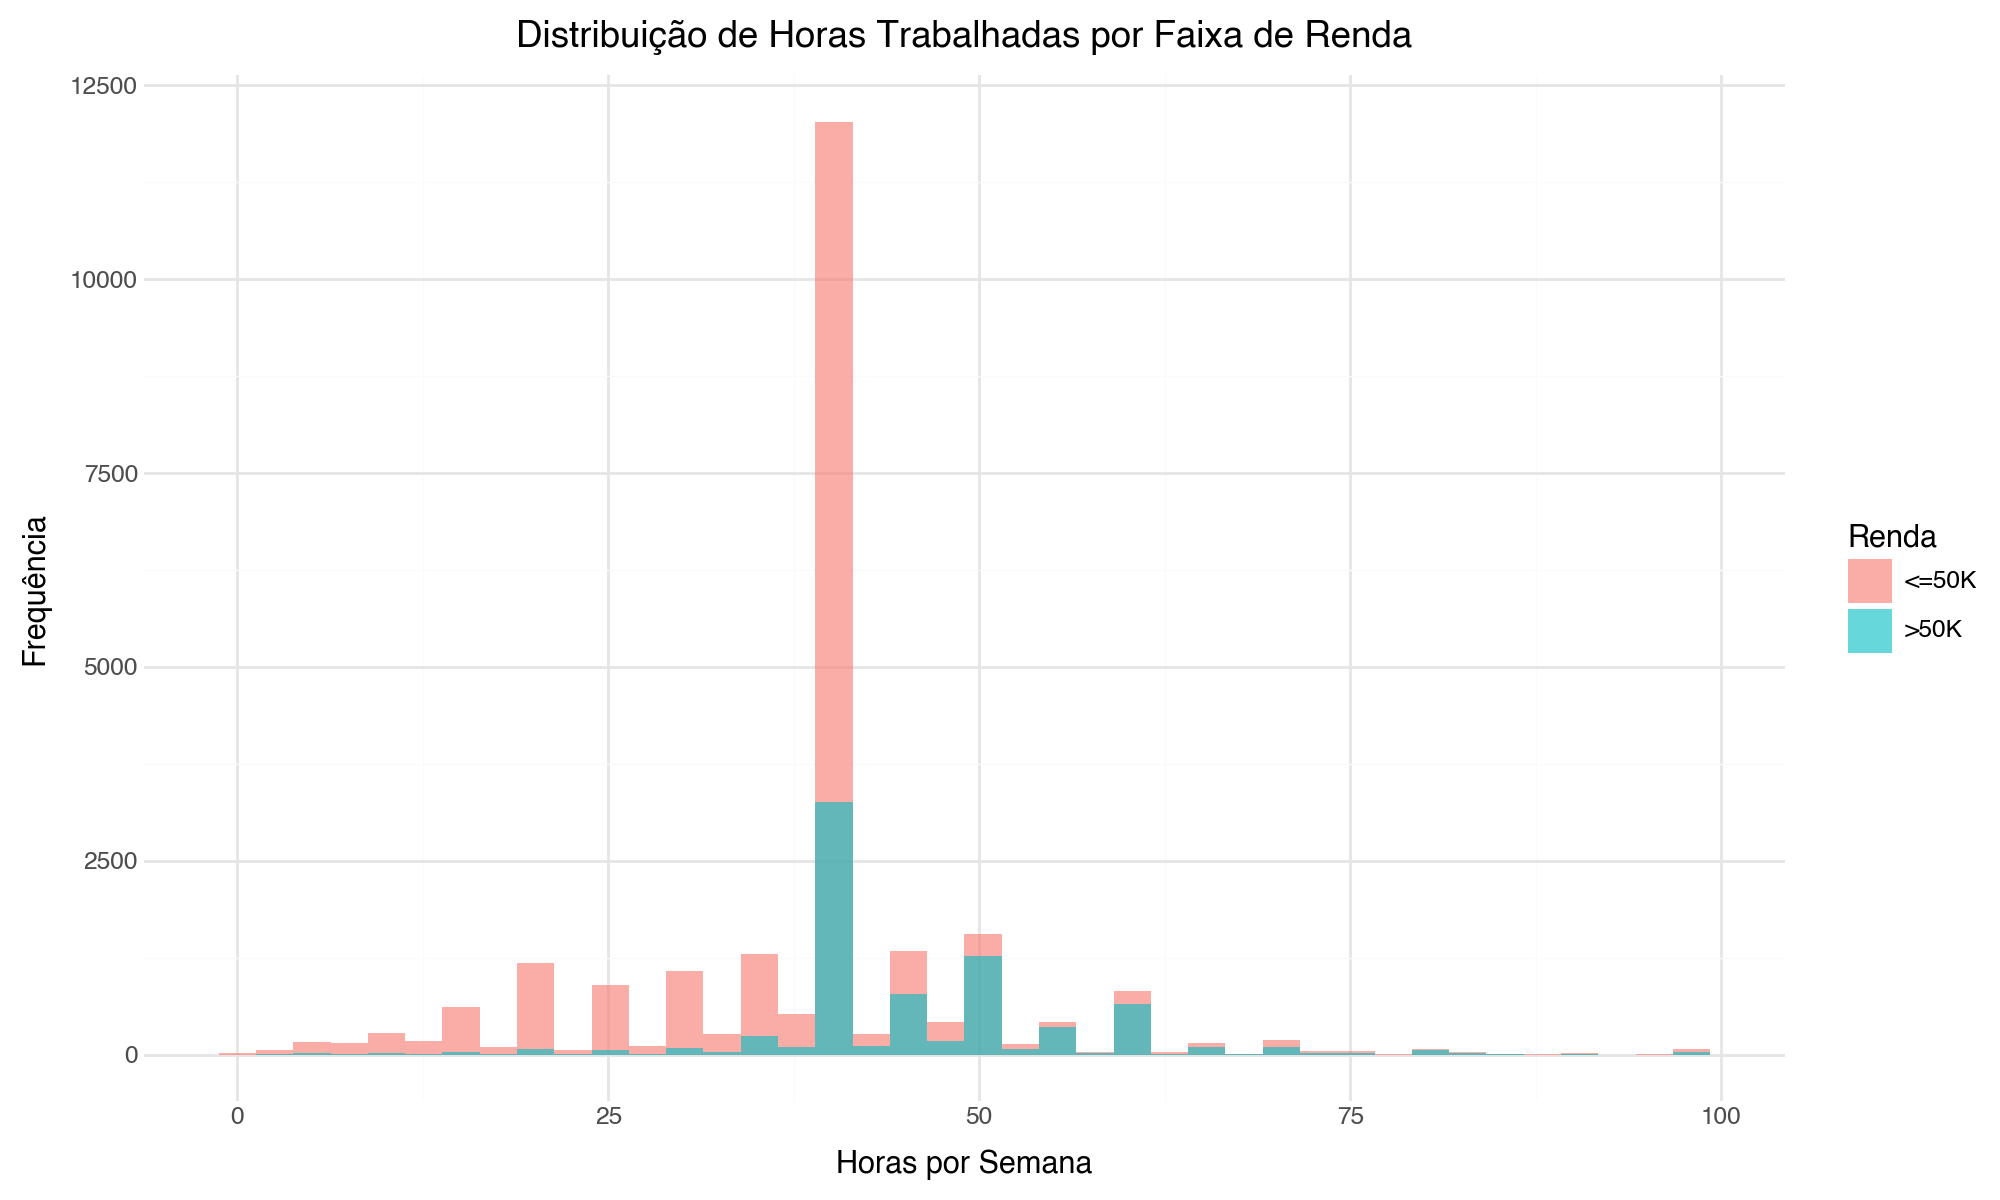

In [ ]:
# Histograma sobreposto das horas trabalhadas
(ggplot(df, aes(x='hours.per.week', fill='income')) +
 geom_histogram(alpha=0.6, bins=40, position='identity') +
 labs(title='Distribuição de Horas Trabalhadas por Faixa de Renda',
      x='Horas por Semana',
      y='Frequência',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 6)))


In [ ]:
# Estatísticas descritivas de horas trabalhadas por renda
df.groupby('income')['hours.per.week'].describe()


,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


**Interpretação:**

Os gráficos revelam uma **diferença moderada, mas significativa** nas horas trabalhadas entre as faixas de renda:

- Indivíduos com renda **superior a 50 mil dólares** trabalham em média **45 horas por semana**, enquanto aqueles com renda menor ou igual a 50 mil trabalham cerca de **39 horas por semana**
- Ambas as distribuições apresentam um pico em torno de **40 horas semanais**, que é a carga horária padrão de trabalho em tempo integral
- O boxplot mostra que a faixa de alta renda possui uma mediana ligeiramente maior e uma distribuição com maior concentração acima das 40 horas
- Observa-se também que há indivíduos em ambas as faixas trabalhando valores extremos (menos de 10 horas ou mais de 80 horas por semana)

Isso sugere que, embora horas trabalhadas sejam um fator relevante, **não são o único determinante da renda**


### 3. Estado Civil e Renda

O estado civil pode influenciar a renda de diversas formas, incluindo dupla renda familiar, responsabilidades financeiras e estabilidade. Vamos investigar essa relação.


In [ ]:
# Contagem por estado civil e renda
marital_income = (df
                  .groupby(['marital.status', 'income'])
                  .size()
                  .reset_index(name='count'))

marital_income


,marital.status,income,count
0,Divorced,<=50K,3980
1,Divorced,>50K,463
2,Married-AF-spouse,<=50K,13
3,Married-AF-spouse,>50K,10
4,Married-civ-spouse,<=50K,8284
5,Married-civ-spouse,>50K,6692
6,Married-spouse-absent,<=50K,384
7,Married-spouse-absent,>50K,34
8,Never-married,<=50K,10192
9,Never-married,>50K,491


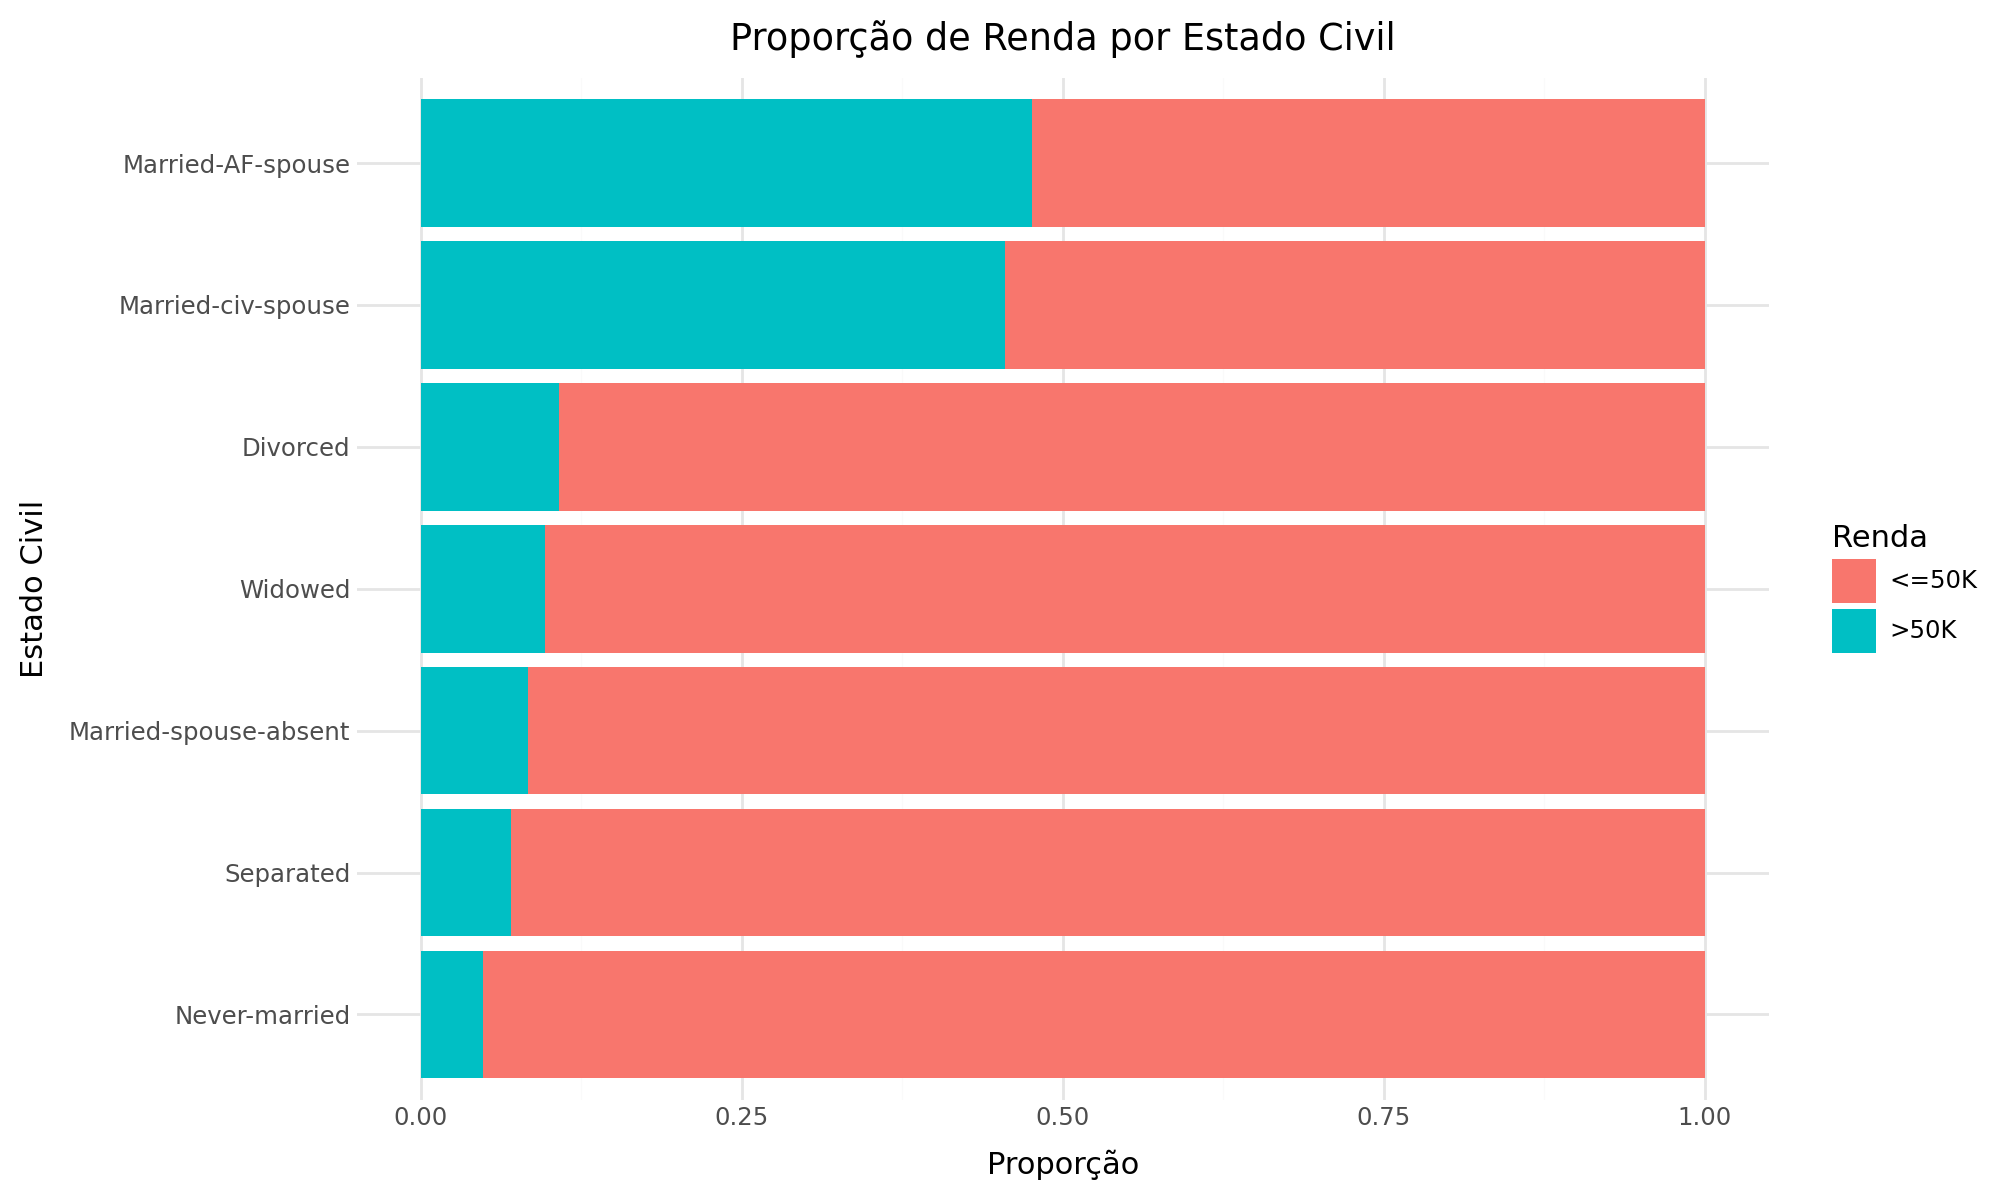

In [19]:
# Gráfico de barras com proporção de renda por estado civil
# Ordenando estado civil pela proporção de alta renda
marital_order = (df
                 .groupby('marital.status')
                 .agg(high_income=('income', lambda x: (x == '>50K').sum()),
                      total=('income', 'count'))
                 .assign(prop=lambda x: x['high_income'] / x['total'])
                 .sort_values('prop')
                 .index.tolist())

(df
 .assign(**{'marital.status': lambda _: pd.Categorical(_['marital.status'], categories=marital_order, ordered=True)})
 .pipe(lambda _: ggplot(_, aes(x='marital.status', fill='income')) +
           geom_bar(position='fill') +
           coord_flip() +
           labs(title='Proporção de Renda por Estado Civil',
                x='Estado Civil',
                y='Proporção',
                fill='Renda') +
           theme_minimal() +
           theme(figure_size=(10, 6))))

In [ ]:
# Proporção de alta renda por estado civil
marital_prop = (df
                .groupby('marital.status')
                .agg(
                    total=('income', 'count'),
                    high_income=('income', lambda x: (x == '>50K').sum())
                )
                .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                .sort_values('prop_high_income', ascending=False)
                .reset_index())

marital_prop


,marital.status,total,high_income,prop_high_income
0,Married-civ-spouse,14976,6692,44.684829
1,Married-AF-spouse,23,10,43.478261
2,Divorced,4443,463,10.420887
3,Widowed,993,85,8.559919
4,Married-spouse-absent,418,34,8.133971
5,Separated,1025,66,6.439024
6,Never-married,10683,491,4.596087


**Interpretação:**

O estado civil mostra uma **forte associação com a renda**, sendo um dos fatores mais discriminantes observados até agora:

- **Married-civ-spouse** (casado com cônjuge civil) apresenta de longe a maior proporção de alta renda, com aproximadamente **44%** dos indivíduos ganhando mais de 50 mil dólares
- **Married-AF-spouse** (casado com cônjuge nas forças armadas) também apresenta altas proporções de com aproximadamente **43%** dos indivíduos ganhando mais de 50 mil dólares

- Essa categoria se destaca significativamente das demais, sugerindo que o casamento está associado a maior poder aquisitivo.

- Estados civis como **Married-spouse-absent** (casado mas cônjuge ausente), **Divorced** (divorciado), **Separated** (separado), **Widowed** (viúvo) e **Never-married** (nunca casou) apresentam proporções consideravelmente menores, entre 4-10%


Esses resultados podem reflem que a possível combinação de renda e **estabilidade financeira e social** associada ao casamento, tende a ter um grande impacto na definição de rendas >=50K


### 4. Ocupação e Renda

A ocupação profissional é intuitivamente um dos fatores mais diretos na determinação da renda. Vamos analisar quais ocupações estão mais associadas a rendas elevadas.


In [ ]:
# Calculando proporção de alta renda por ocupação
occupation_prop = (df
                   .groupby('occupation')
                   .agg(
                       total=('income', 'count'),
                       high_income=('income', lambda x: (x == '>50K').sum())
                   )
                   .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                   .sort_values('prop_high_income', ascending=False)
                   .reset_index())

occupation_prop


,occupation,total,high_income,prop_high_income
0,Exec-managerial,4066,1968,48.401377
1,Prof-specialty,4140,1859,44.903382
2,Protective-serv,649,211,32.511556
3,Tech-support,928,283,30.495690
4,Sales,3650,983,26.931507
5,Craft-repair,4099,929,22.664064
6,Transport-moving,1597,320,20.037570
7,Adm-clerical,3770,507,13.448276
8,Machine-op-inspct,2002,250,12.487512
9,Farming-fishing,994,115,11.569416


In [23]:
(ggplot(occupation_prop, aes(x='reorder(occupation, prop_high_income)', 
                             y='prop_high_income')) +
 geom_bar(stat='identity', fill='#2E86AB') +
 coord_flip() +
 labs(title='Proporção de Alta Renda (>50K) por Ocupação',
      x='Ocupação',
      y='Proporção de Alta Renda (%)') +
 theme_minimal() +
 theme(figure_size=(10, 8)))

NameError: name 'occupation_prop' is not defined

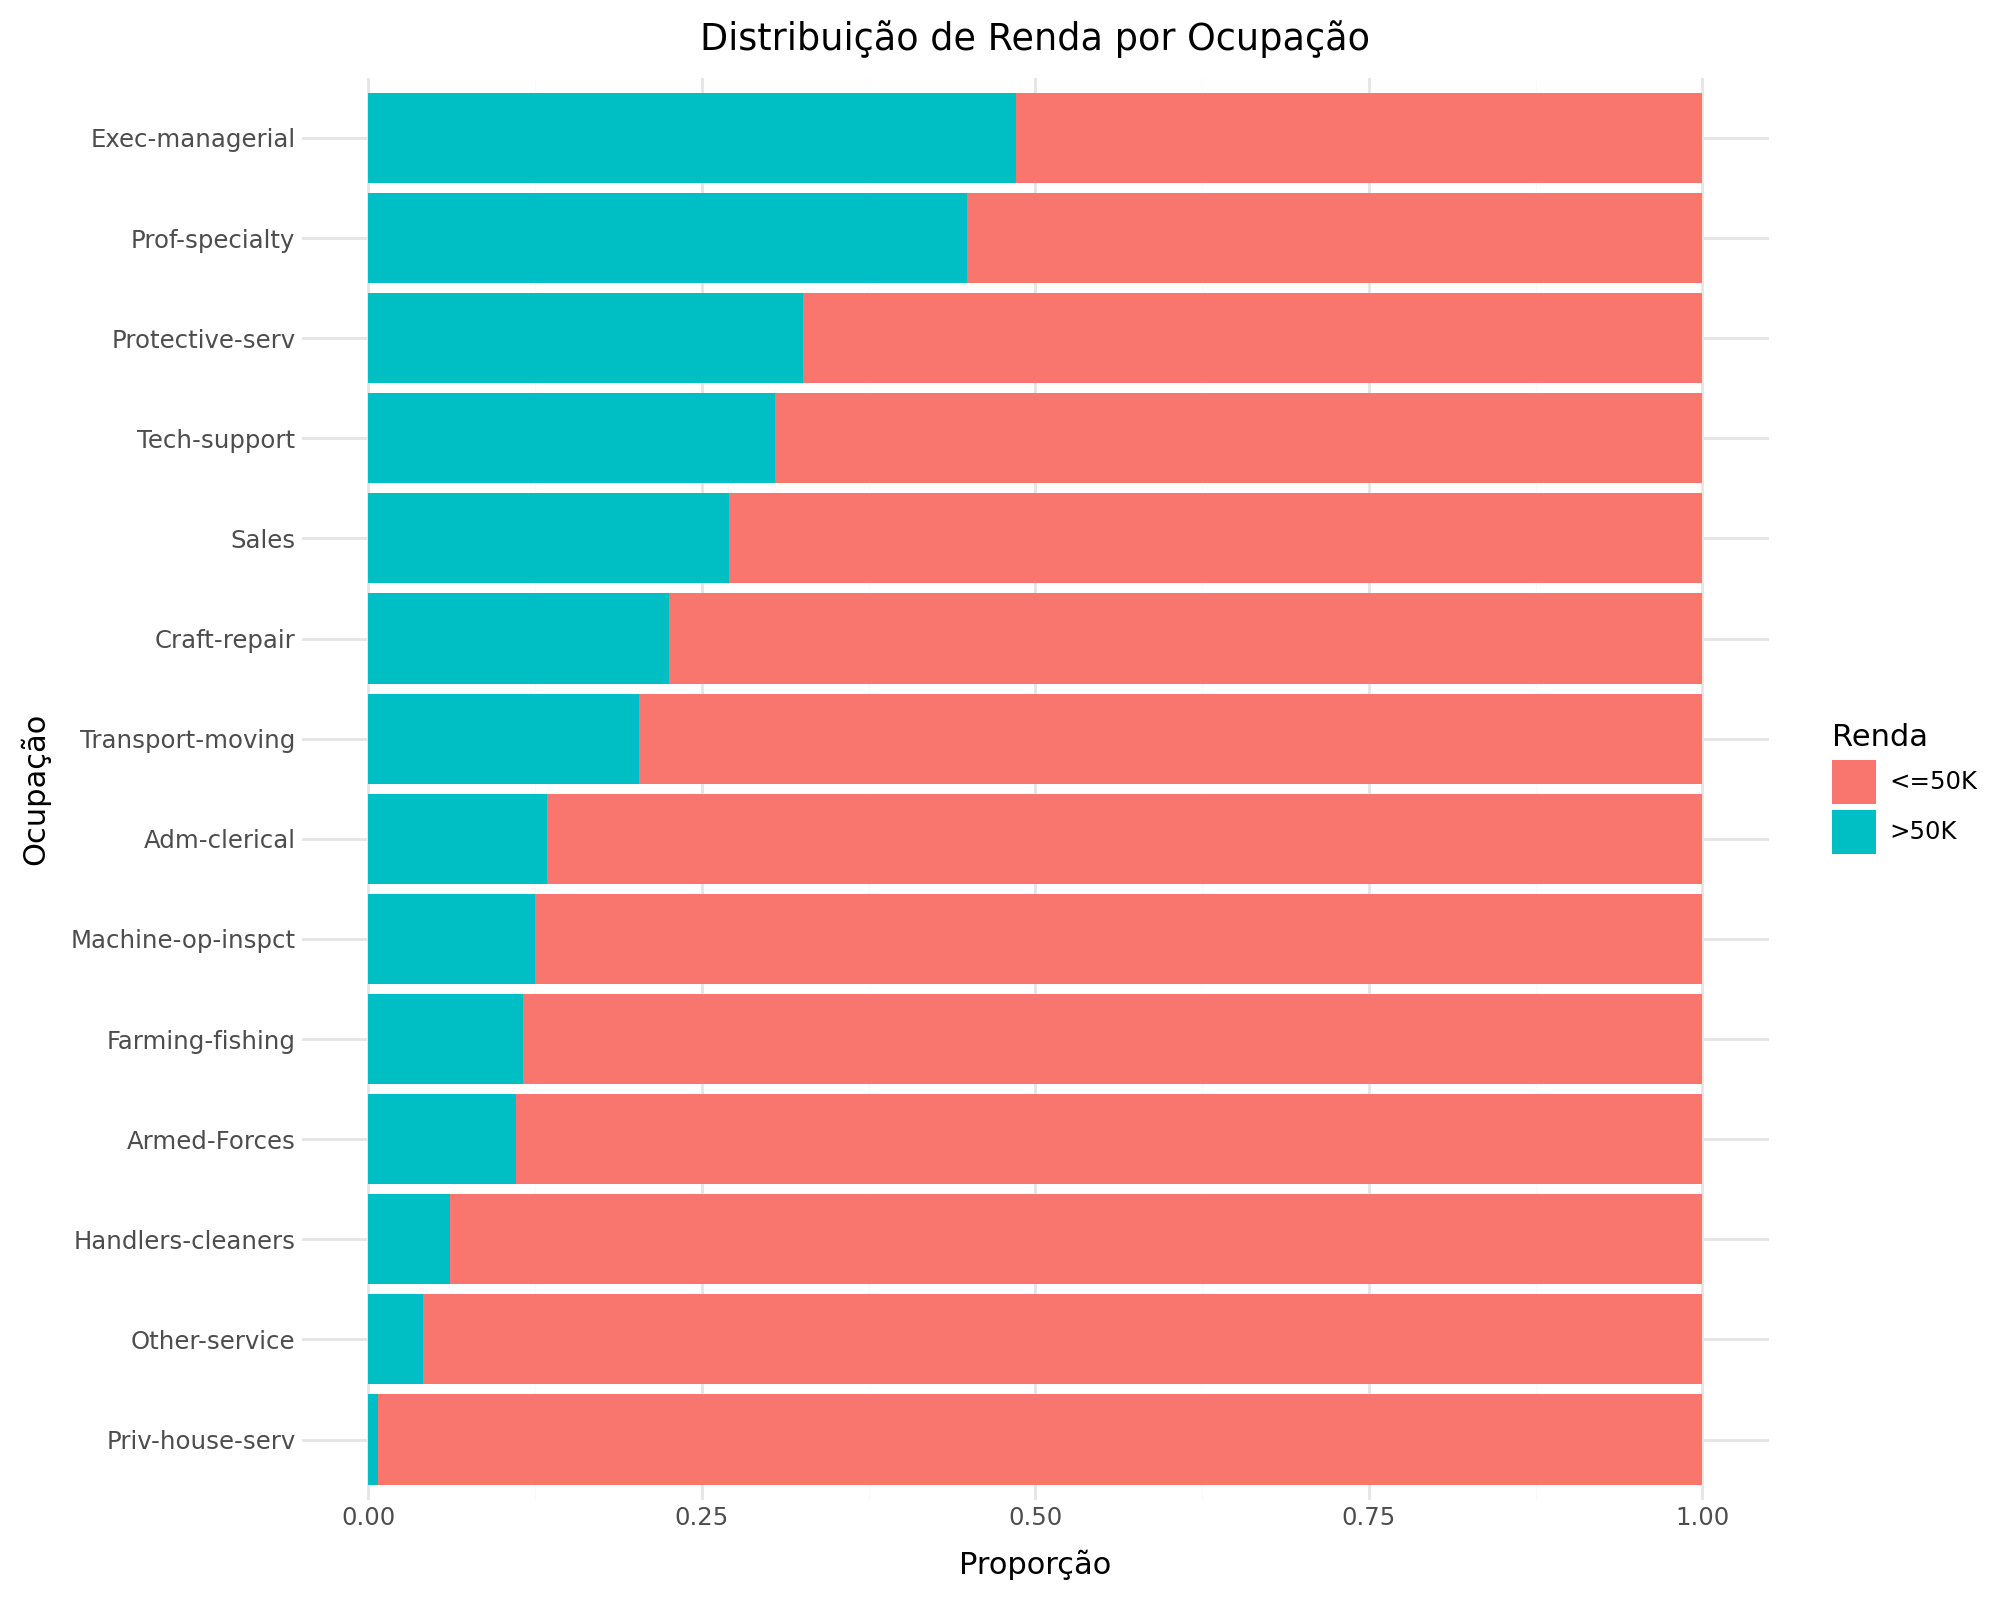

In [24]:
# Gráfico mostrando volume e proporção
# Ordenando ocupação pela proporção de alta renda
occupation_order = (df
                    .groupby('occupation')
                    .agg(high_income=('income', lambda x: (x == '>50K').sum()),
                         total=('income', 'count'))
                    .assign(prop=lambda x: x['high_income'] / x['total'])
                    .sort_values('prop')
                    .index.tolist())

(df
 .assign(occupation=lambda _: pd.Categorical(_.occupation, categories=occupation_order, ordered=True))
 .pipe(lambda _: ggplot(_, aes(x='occupation', fill='income')) +
           geom_bar(position='fill') +
           coord_flip() +
           labs(title='Distribuição de Renda por Ocupação',
                x='Ocupação',
                y='Proporção',
                fill='Renda') +
           theme_minimal() +
           theme(figure_size=(10, 8))))

**Interpretação:**

A ocupação mostra **variações dramáticas** na proporção de alta renda, confirmando sua importância como fator determinante:

**Ocupações de alta renda (>40%):**
- **Exec-managerial** (executivos/gerentes) lidera com cerca de 50% de alta renda
- **Prof-specialty** (profissionais especializados) segue com aproximadamente 44%
- Essas ocupações normalmente exigem educação superior e habilidades especializadas

**Ocupações de renda intermediária (20-30%):**
- **Tech-support** (suporte técnico), **Sales** (vendas), **Protective-serv** (serviços de proteção)
- Ocupações que podem exigir treinamento técnico ou especialização moderada

**Ocupações de baixa renda (<15%):**
- **Priv-house-serv** (serviços domésticos privados) tem a menor proporção, praticamente 0%
- **Other-service** (outros serviços), **Handlers-cleaners** (manipuladores/limpeza), **Farming-fishing** (agricultura/pesca)
- Essas ocupações geralmente não requerem educação formal avançada e tendem a ter salários mais baixos

A disparidade observada reflete a estrutura do mercado de trabalho, onde ocupações que exigem maior qualificação e responsabilidade são melhor remuneradas.


### 5. País de Origem (Native Country) e Renda

A variável native.country indica o país de origem dos indivíduos. Como o dataset é composto principalmente por residentes dos Estados Unidos, vamos investigar se há diferenças significativas de renda entre nativos americanos e imigrantes.



In [25]:

# Explorando a distribuição de países
print("Total de países únicos no dataset:")
print(df['native.country'].nunique())
print("\nPaíses mais frequentes:")
df['native.country'].value_counts().head(10)

Total de países únicos no dataset:
41

Países mais frequentes:


native.country
United-States    27504
Mexico             610
Philippines        188
Germany            128
Puerto-Rico        109
Canada             107
El-Salvador        100
India              100
Cuba                92
England             86
Name: count, dtype: int64

In [26]:
# Criando uma variável binária: USA vs Outros países
df_country = (df
              .assign(country_group=lambda _: _.apply(
                  lambda row: 'United-States' if row['native.country'] == 'United-States' else 'Other Countries',
                  axis=1
              )))

# Calculando proporção de alta renda por grupo
country_prop = (df_country
                .groupby('country_group')
                .agg(
                    total=('income', 'count'),
                    high_income=('income', lambda x: (x == '>50K').sum())
                )
                .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                .reset_index())

country_prop

,country_group,total,high_income,prop_high_income
0,Other Countries,2658,513,19.300226
1,United-States,27504,6995,25.432664


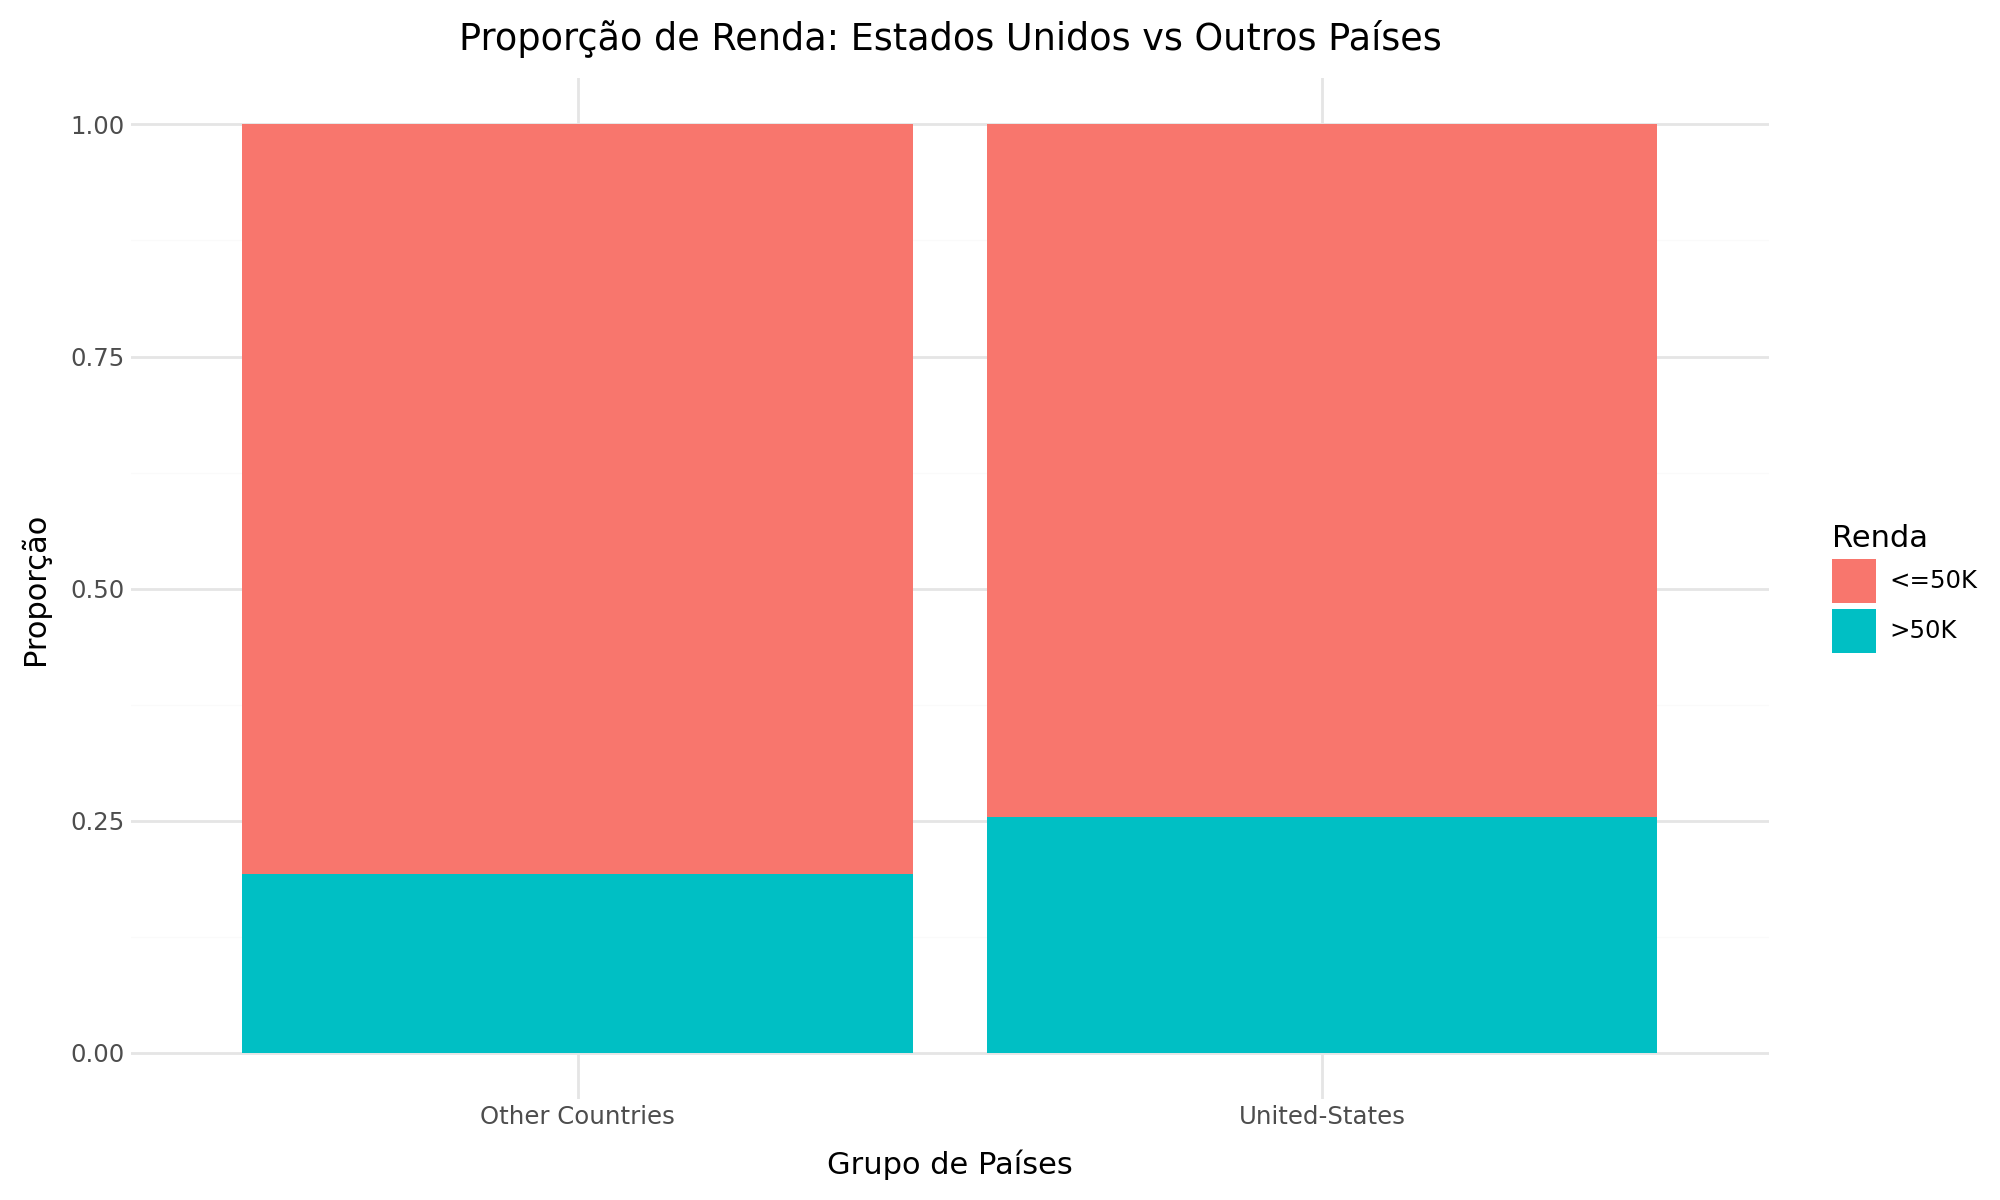

In [27]:
# Gráfico comparando USA vs Outros países
(ggplot(df_country, aes(x='country_group', fill='income')) +
 geom_bar(position='fill') +
 labs(title='Proporção de Renda: Estados Unidos vs Outros Países',
      x='Grupo de Países',
      y='Proporção',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 6)))

In [28]:
# Analisando todos os países (excluindo USA)
# Filtrando apenas países com pelo menos 50 indivíduos para ter amostra significativa
countries_analysis = (df
                      .query('`native.country` != "United-States"')
                      .groupby('native.country')
                      .agg(
                          total=('income', 'count'),
                          high_income=('income', lambda x: (x == '>50K').sum())
                      )
                      .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                      .query('total >= 50')  # Filtrar países com pelo menos 50 indivíduos
                      .sort_values('prop_high_income', ascending=False)
                      .reset_index())

print(f"Total de países analisados (com amostra >= 50): {len(countries_analysis)}")
countries_analysis

Total de países analisados (com amostra >= 50): 19


,native.country,total,high_income,prop_high_income
0,India,100,40,40.000000
1,Japan,59,23,38.983051
2,Italy,68,24,35.294118
3,England,86,30,34.883721
4,Germany,128,44,34.375000
5,Canada,107,36,33.644860
6,Philippines,188,60,31.914894
7,China,68,20,29.411765
8,Cuba,92,25,27.173913
9,South,71,14,19.718310


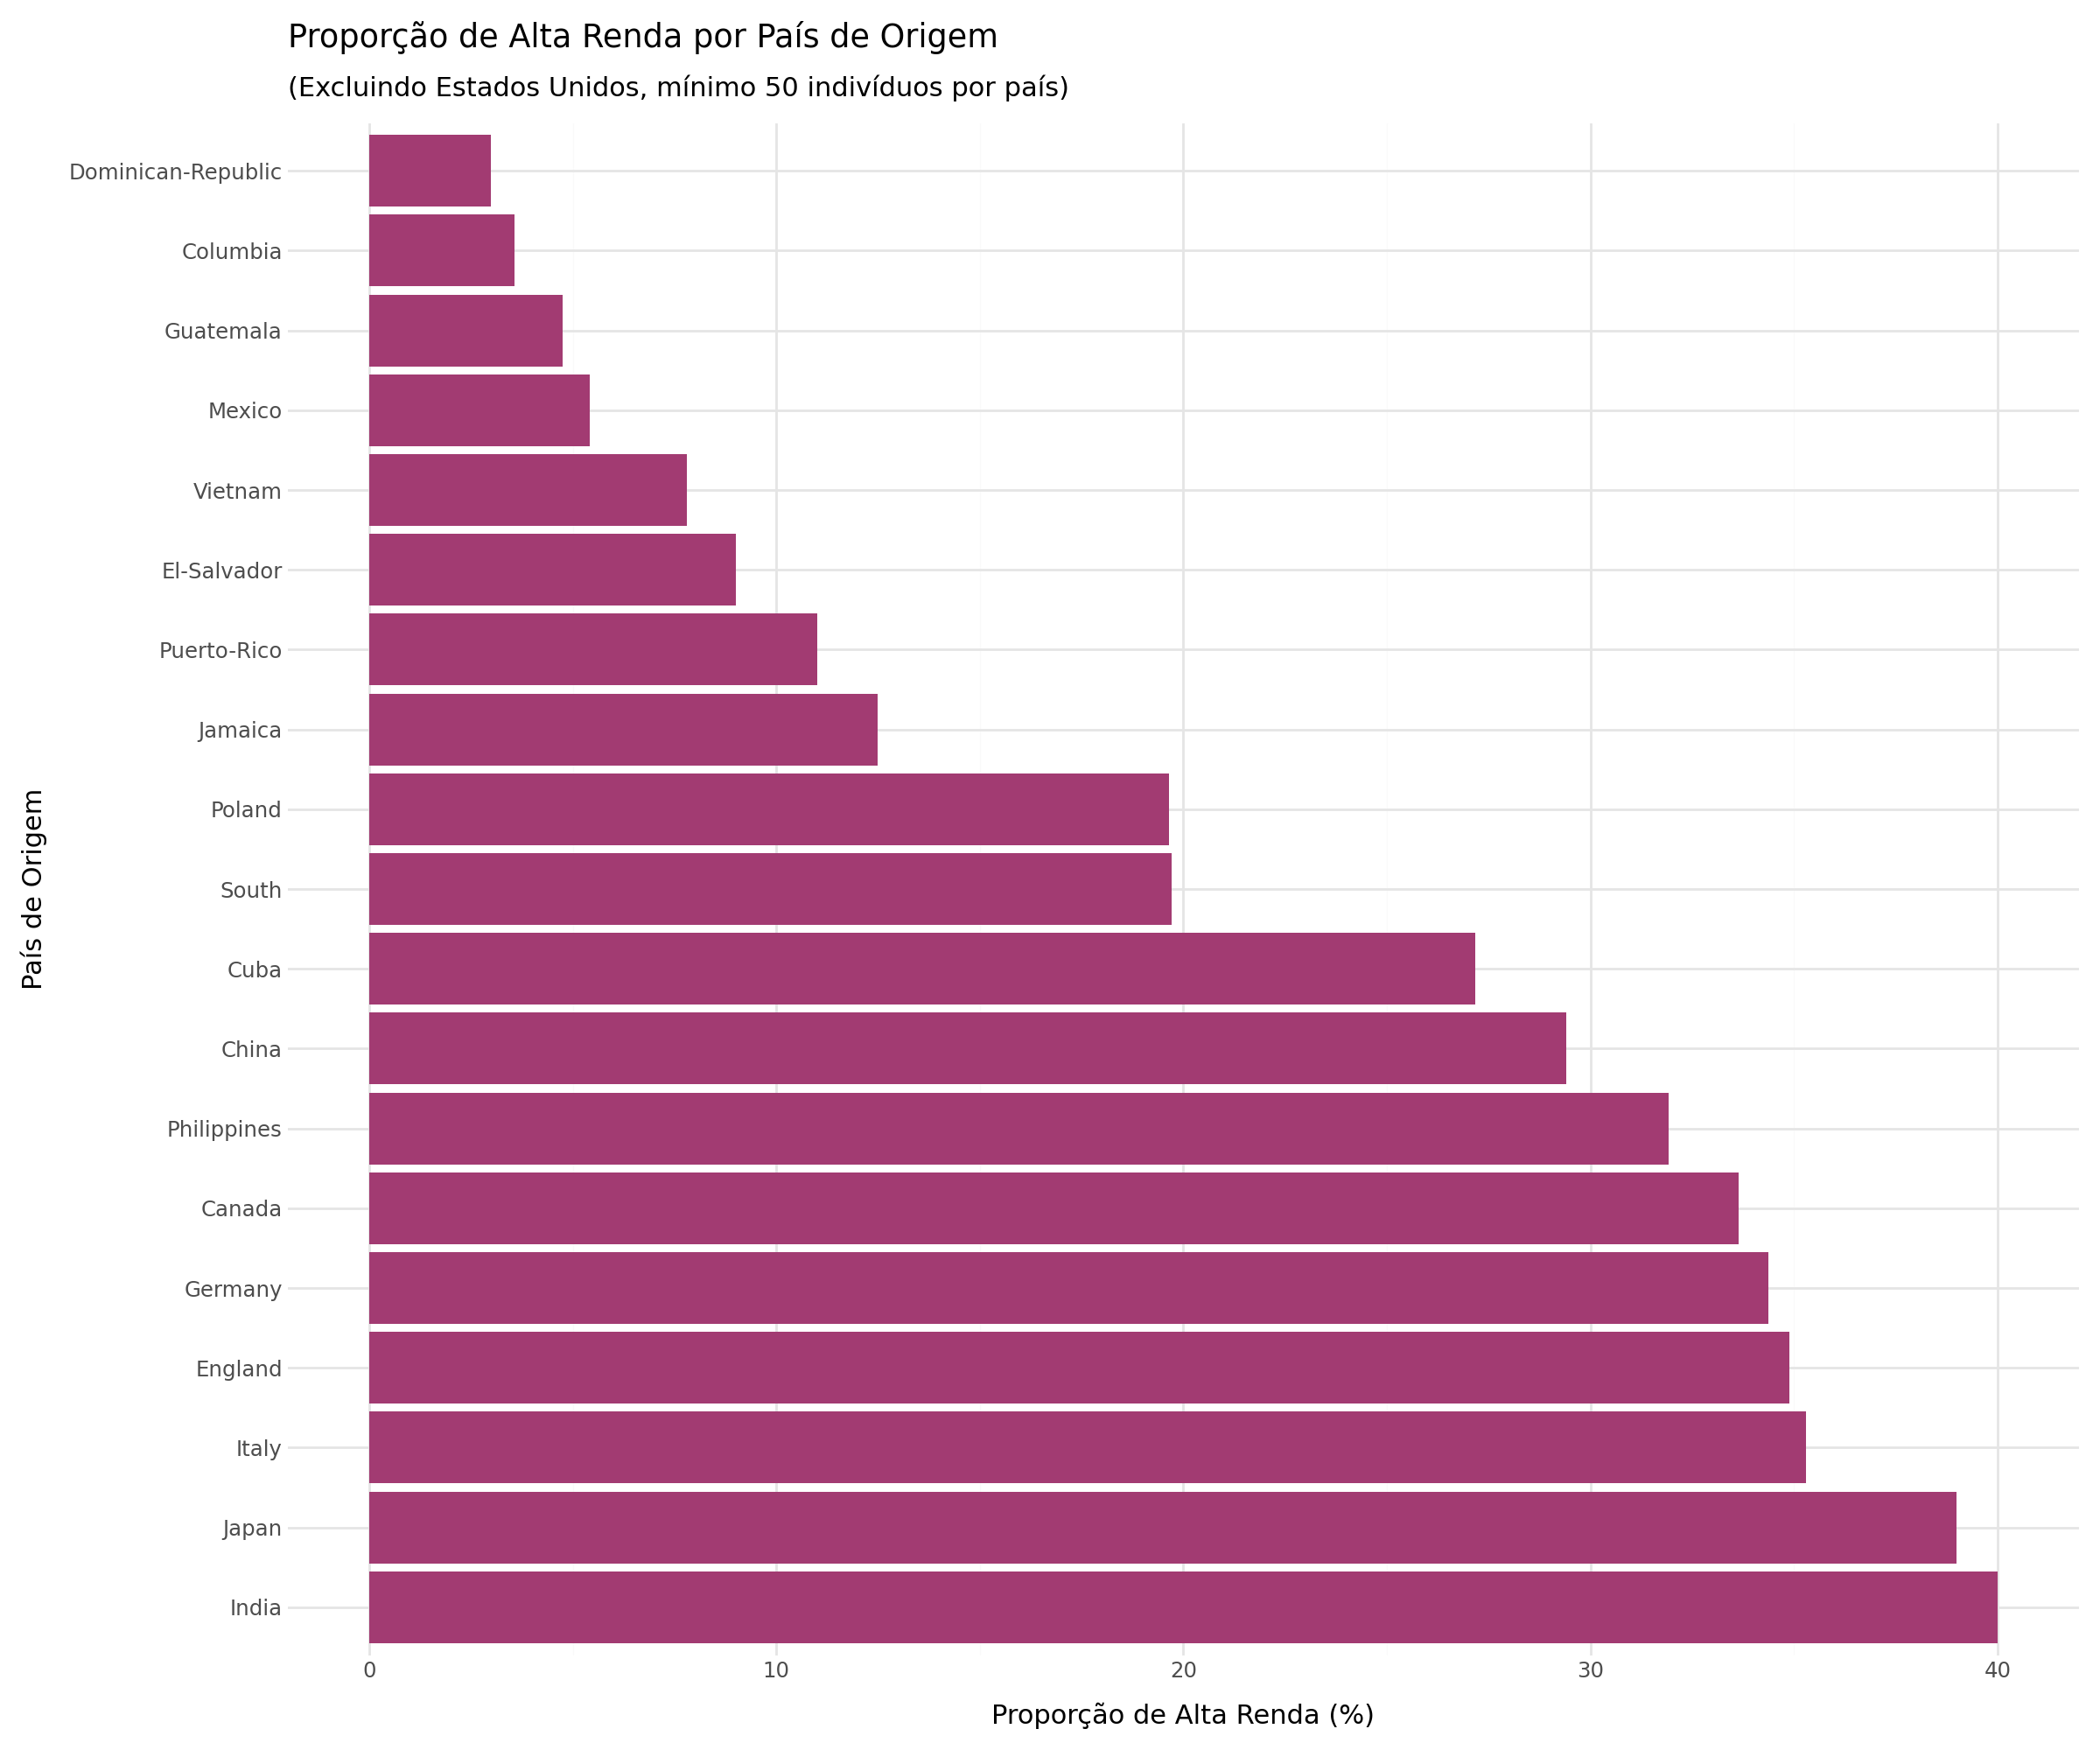

In [29]:
# Gráfico de todos os países com proporção de alta renda
# Ordenando países pela proporção de alta renda
(countries_analysis
 .assign(**{'native.country': lambda _: pd.Categorical(_['native.country'], 
                                                       categories=_['native.country'].tolist(), 
                                                       ordered=True)})
 .pipe(lambda _: ggplot(_, aes(x='native.country', y='prop_high_income')) +
           geom_bar(stat='identity', fill='#A23B72') +
           coord_flip() +
           labs(title='Proporção de Alta Renda por País de Origem',
                subtitle='(Excluindo Estados Unidos, mínimo 50 indivíduos por país)',
                x='País de Origem',
                y='Proporção de Alta Renda (%)') +
           theme_minimal() +
           theme(figure_size=(12, 10))))

### 6. Interação entre Gênero e Educação na Distribuição de Renda

A hipótese é que mesmo com o mesmo nível de educação, o gênero pode influenciar a probabilidade de obter uma renda superior a 50 mil dólares anuais.

In [30]:
# Criação de tabela com proporção de renda >50K por gênero e nível educacional
edu_gender = (
    df.groupby(['sex', 'education'])['income']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

# Apenas a proporção de alta renda (>50K)
edu_gender_high = edu_gender[edu_gender['income'] == '>50K'].copy()

education_order = (
    edu_gender_high.groupby('education')['proportion']
    .mean()
    .sort_values()
    .index.tolist()
)

edu_gender_high['education'] = pd.Categorical(
    edu_gender_high['education'],
    categories=education_order,
    ordered=True
)

edu_gender_high.head()

,sex,education,income,proportion
1,Female,10º ano (1º EM),>50K,0.008000
3,Female,11º ano (2º EM),>50K,0.021563
5,Female,12º ano (3º EM),>50K,0.016393
8,Female,5ª a 6ª série,>50K,0.028986
10,Female,7ª a 8ª série,>50K,0.007576


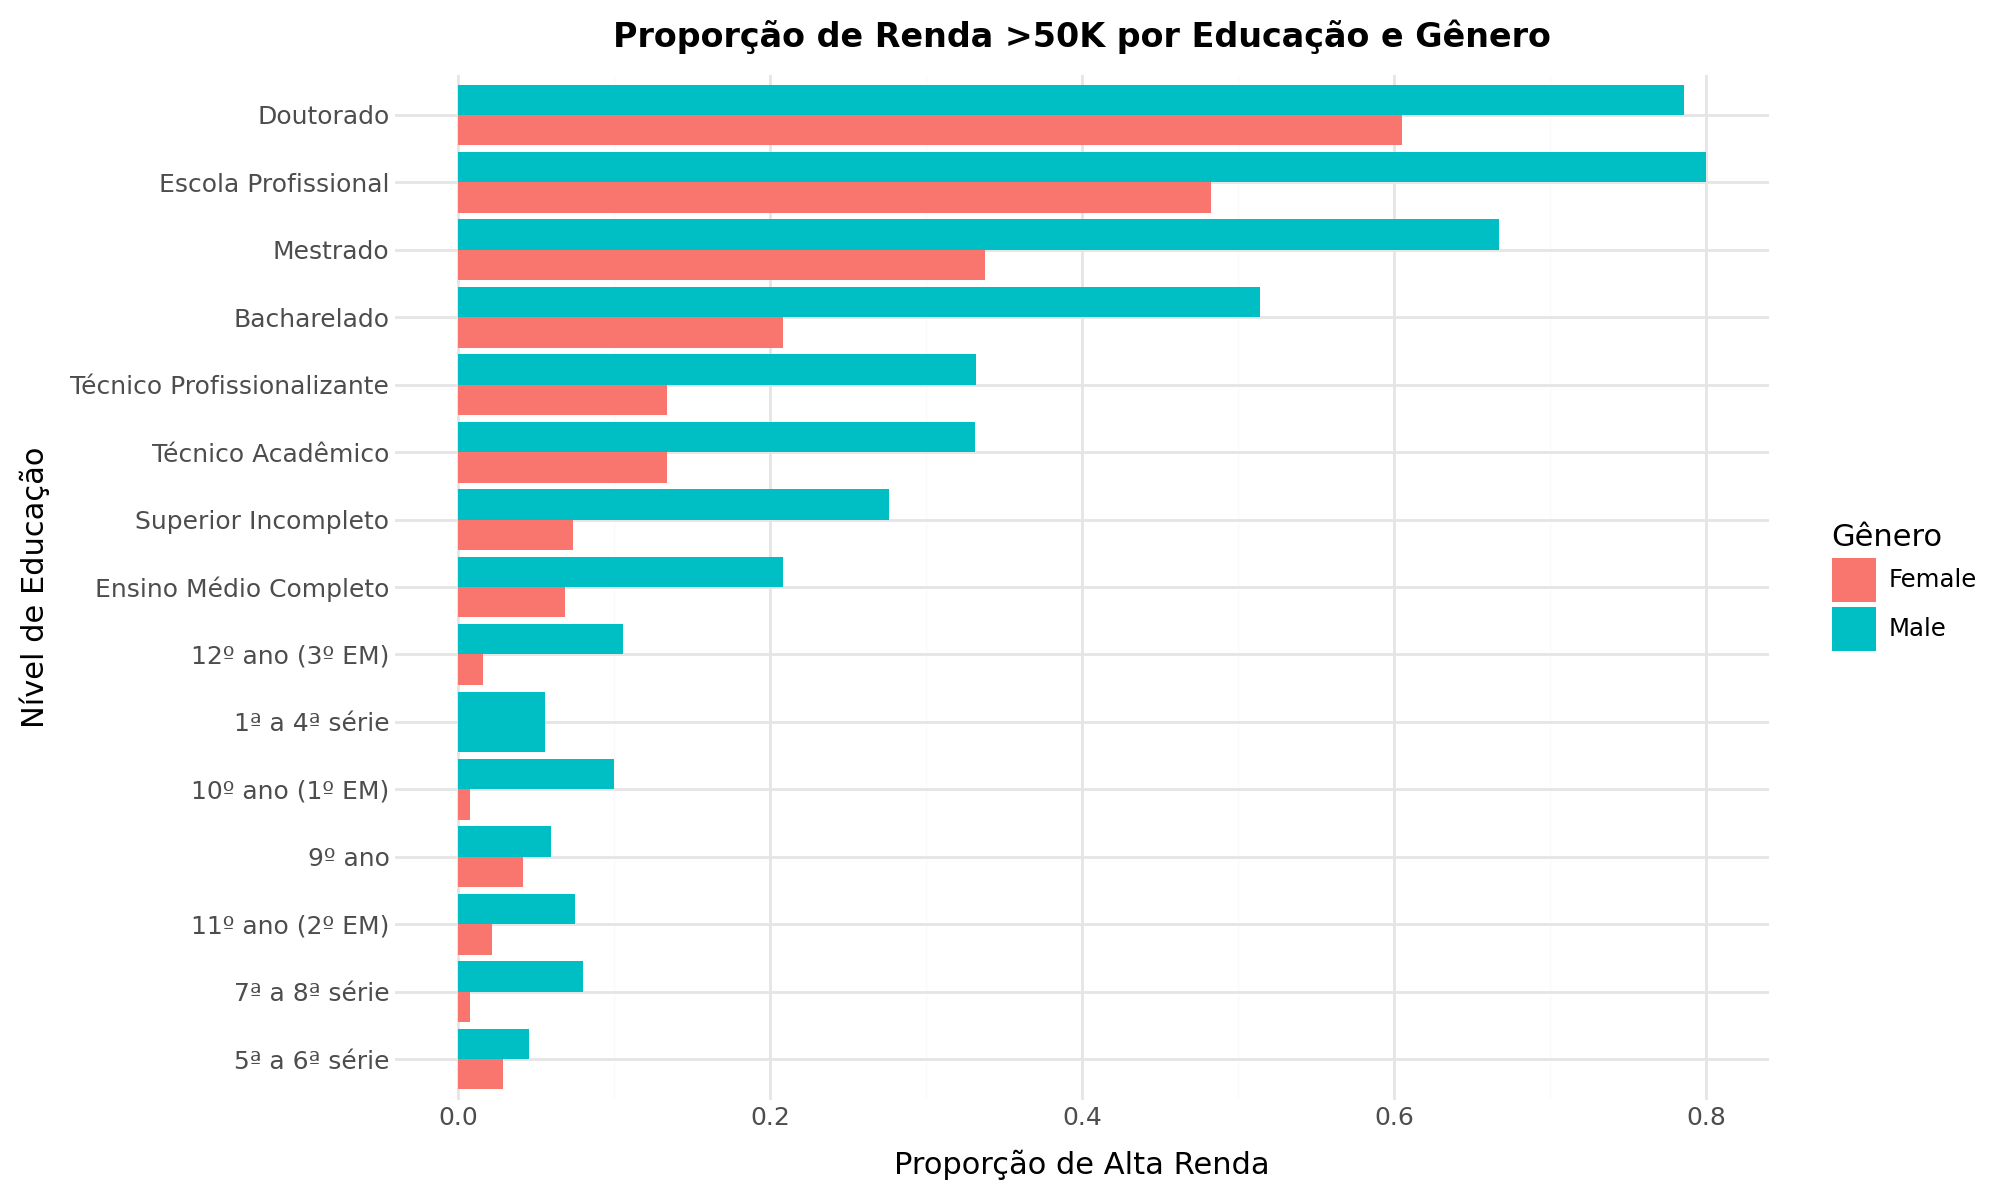

In [31]:
(ggplot(edu_gender_high, aes(x='education', y='proportion', fill='sex')) +
    geom_col(position='dodge') +
    coord_flip() +
    labs(
        title='Proporção de Renda >50K por Educação e Gênero',
        x='Nível de Educação',
        y='Proporção de Alta Renda',
        fill='Gênero'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        axis_text_y=element_text(size=9),
        axis_text_x=element_text(size=9),
        plot_title=element_text(weight='bold', size=12)
    )
)

## **Interpretação**

- Em todos os níveis de educação, homens apresentam uma proporção maior de renda acima de 50K em relação às mulheres.

- A diferença é mais acentuada em níveis intermediários de escolaridade, como Some-college e Bachelors.

- Nos níveis mais altos (Masters, Doctorate e Prof-school), as mulheres se aproximam mais dos homens, embora ainda exista uma lacuna.

Esses resultados sugerem que o retorno educacional não é igual entre gêneros ou seja, mesmo com o mesmo grau de formação, homens ainda tendem a ter maior probabilidade de atingir altas faixas de renda.

In [32]:
# Diferença percentual entre homens e mulheres em cada nível educacional
diff_by_edu = (
    edu_gender_high
    .pivot(index='education', columns='sex', values='proportion')
    .assign(diff=lambda x: (x['Male'] - x['Female']) * 100)
    .sort_values('diff', ascending=False)
)

diff_by_edu


sex,Female,Male,diff
education,,,
Mestrado,0.337917,0.667263,32.934548
Escola Profissional,0.482759,0.800000,31.724138
Bacharelado,0.208279,0.513629,30.535004
Superior Incompleto,0.073793,0.275953,20.215963
Técnico Profissionalizante,0.134066,0.332160,19.809369
Técnico Acadêmico,0.134177,0.331158,19.698102
Doutorado,0.604938,0.785714,18.077601
Ensino Médio Completo,0.068577,0.208494,13.991726
10º ano (1º EM),0.008000,0.100000,9.200000


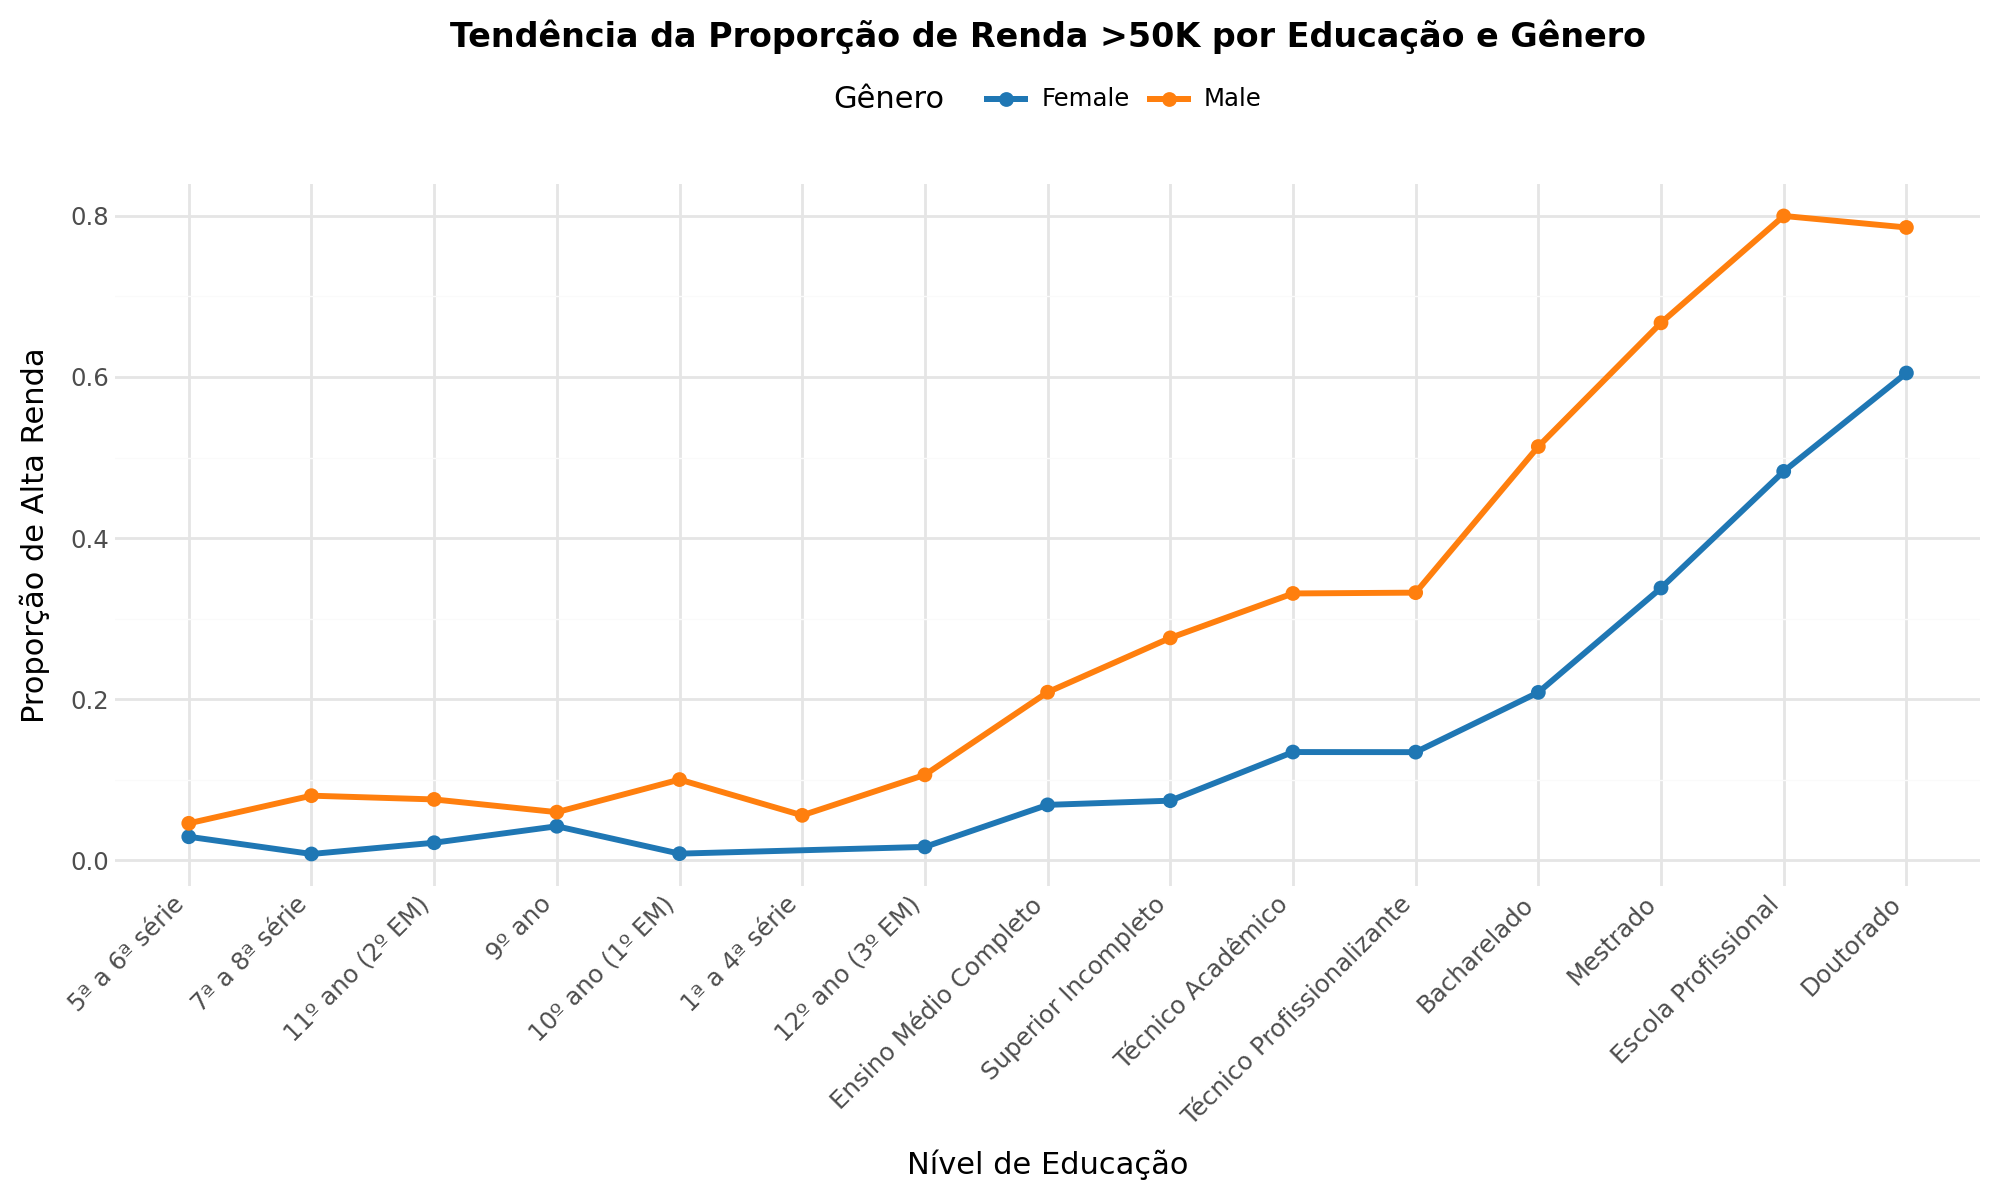

In [34]:
(ggplot(edu_gender_high, aes(x='education', y='proportion', color='sex', group='sex')) +
    geom_line(size=1.2) +
    geom_point(size=2) +
    scale_color_manual(values=['#1f77b4', '#ff7f0e']) +
    labs(
        title='Tendência da Proporção de Renda >50K por Educação e Gênero',
        x='Nível de Educação',
        y='Proporção de Alta Renda',
        color='Gênero'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        axis_text_x=element_text(rotation=45, hjust=1),
        plot_title=element_text(weight='bold', size=12),
        legend_position='top'
    )
)

### **Interpretação**

- A proporção de renda alta aumenta consistentemente conforme cresce o nível de educação, tanto para homens quanto para mulheres.

- Em todos os níveis, os homens mantêm vantagem, mas a lacuna diminui nos níveis mais altos.

- A educação é um fator mitigador, mas não suficiente por si só para equalizar as oportunidades de alta renda entre homens e mulheres.

### Modelo de Previsão: Random Forest Classifier
Agora vamos construir um modelo de Random Forest para prever a faixa de renda (income) com base nas características disponíveis no dataset.

**Objetivos:**

1. Preparar os dados (encoding de variáveis categóricas)

2. Dividir em treino e teste

3. Treinar o modelo Random Forest

4. Avaliar performance (Acurácia, Recall, F1-Score)

5. Comparar com um modelo baseline (Dummy Classifier)

6. Identificar as variáveis mais importantes

## 1. Preparação dos Dados
Primeiro, vamos preparar os dados para o modelo. Precisamos:

- Separar features (X) e target (y)

- Codificar variáveis categóricas usando One-Hot Encoding

- Dividir em conjuntos de treino e teste (80/20)

In [35]:
# Importando bibliotecas necessárias para o modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Preparando os dados
# Fazendo uma cópia do dataframe para não alterar o original
df_model = df.copy()

# Separando features (X) e target (y)
X = df_model.drop('income', axis=1)
y = df_model['income']

# Codificando a variável target (<=50K = 0, >50K = 1)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Classes do target: {le_target.classes_}")
print(f"Distribuição do target:\n{pd.Series(y_encoded).value_counts()}")
print(f"\nShape de X: {X.shape}")
print(f"Shape de y: {y_encoded.shape}")

Classes do target: ['<=50K' '>50K']
Distribuição do target:
0    22654
1     7508
Name: count, dtype: int64

Shape de X: (30162, 14)
Shape de y: (30162,)


In [36]:
# Identificando colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Colunas categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nColunas numéricas ({len(numerical_cols)}): {numerical_cols}")

# Aplicando One-Hot Encoding nas variáveis categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\nShape de X após encoding: {X_encoded.shape}")
print(f"Total de features: {X_encoded.shape[1]}")

Colunas categóricas (8): ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

Colunas numéricas (6): ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Shape de X após encoding: (30162, 96)
Total de features: 96


In [37]:
# Dividindo em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded  # Mantém a proporção das classes
)

print(f"Dados de treino: {X_train.shape[0]} amostras")
print(f"Dados de teste: {X_test.shape[0]} amostras")
print(f"\nDistribuição no treino:\n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"\nDistribuição no teste:\n{pd.Series(y_test).value_counts(normalize=True)}")

Dados de treino: 24129 amostras
Dados de teste: 6033 amostras

Distribuição no treino:
0    0.751088
1    0.248912
Name: proportion, dtype: float64

Distribuição no teste:
0    0.751036
1    0.248964
Name: proportion, dtype: float64


**2. Modelo Baseline (Dummy Classifier)**

Antes de treinar o Random Forest, vamos criar um modelo baseline usando o Dummy Classifier. Este modelo simplesmente prevê sempre a classe mais frequente, servindo como referência mínima de performance.

In [38]:
# Criando e treinando o Dummy Classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_dummy = dummy_clf.predict(X_test)

# Calculando métricas
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_recall = recall_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)

print("=" * 60)
print("MODELO BASELINE (DUMMY CLASSIFIER)")
print("=" * 60)
print(f"Acurácia:  {dummy_accuracy:.4f} ({dummy_accuracy*100:.2f}%)")
print(f"Recall:    {dummy_recall:.4f} ({dummy_recall*100:.2f}%)")
print(f"F1-Score:  {dummy_f1:.4f} ({dummy_f1*100:.2f}%)")
print("=" * 60)

MODELO BASELINE (DUMMY CLASSIFIER)
Acurácia:  0.7510 (75.10%)
Recall:    0.0000 (0.00%)
F1-Score:  0.0000 (0.00%)


**3. Treinamento do Random Forest**

Agora vamos treinar o modelo Random Forest e avaliar sua performance.

In [39]:
# Criando e treinando o Random Forest Classifier
print("Treinando Random Forest Classifier...")
rf_clf = RandomForestClassifier(
    n_estimators=100,      # Número de árvores
    max_depth=20,          # Profundidade máxima
    min_samples_split=10,  # Mínimo de amostras para dividir um nó
    random_state=42,
    n_jobs=-1              # Usa todos os processadores disponíveis
)

rf_clf.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazendo previsões
y_pred_rf = rf_clf.predict(X_test)

# Calculando métricas
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\n" + "=" * 60)
print("RANDOM FOREST CLASSIFIER")
print("=" * 60)
print(f"Acurácia:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Recall:    {rf_recall:.4f} ({rf_recall*100:.2f}%)")
print(f"F1-Score:  {rf_f1:.4f} ({rf_f1*100:.2f}%)")
print("=" * 60)

Treinando Random Forest Classifier...
Treinamento concluído!

RANDOM FOREST CLASSIFIER
Acurácia:  0.8674 (86.74%)
Recall:    0.6125 (61.25%)
F1-Score:  0.6970 (69.70%)


**4. Comparação de Modelos**

Vamos visualizar a comparação entre o modelo baseline e o Random Forest.

In [40]:
# Criando dataframe com comparação
comparison_df = pd.DataFrame({
    'Modelo': ['Dummy Classifier (Baseline)', 'Random Forest'],
    'Acurácia': [dummy_accuracy, rf_accuracy],
    'Recall': [dummy_recall, rf_recall],
    'F1-Score': [dummy_f1, rf_f1]
})

# Calculando melhoria percentual
comparison_df['Melhoria Acurácia (%)'] = [
    0, 
    ((rf_accuracy - dummy_accuracy) / dummy_accuracy * 100)
]

print("\n" + "=" * 80)
print("COMPARAÇÃO DE MODELOS")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Melting para visualização
comparison_melted = comparison_df[['Modelo', 'Acurácia', 'Recall', 'F1-Score']].melt(
    id_vars='Modelo',
    var_name='Métrica',
    value_name='Valor'
)


COMPARAÇÃO DE MODELOS
                     Modelo  Acurácia   Recall  F1-Score  Melhoria Acurácia (%)
Dummy Classifier (Baseline)  0.751036 0.000000   0.00000               0.000000
              Random Forest  0.867396 0.612517   0.69697              15.493269


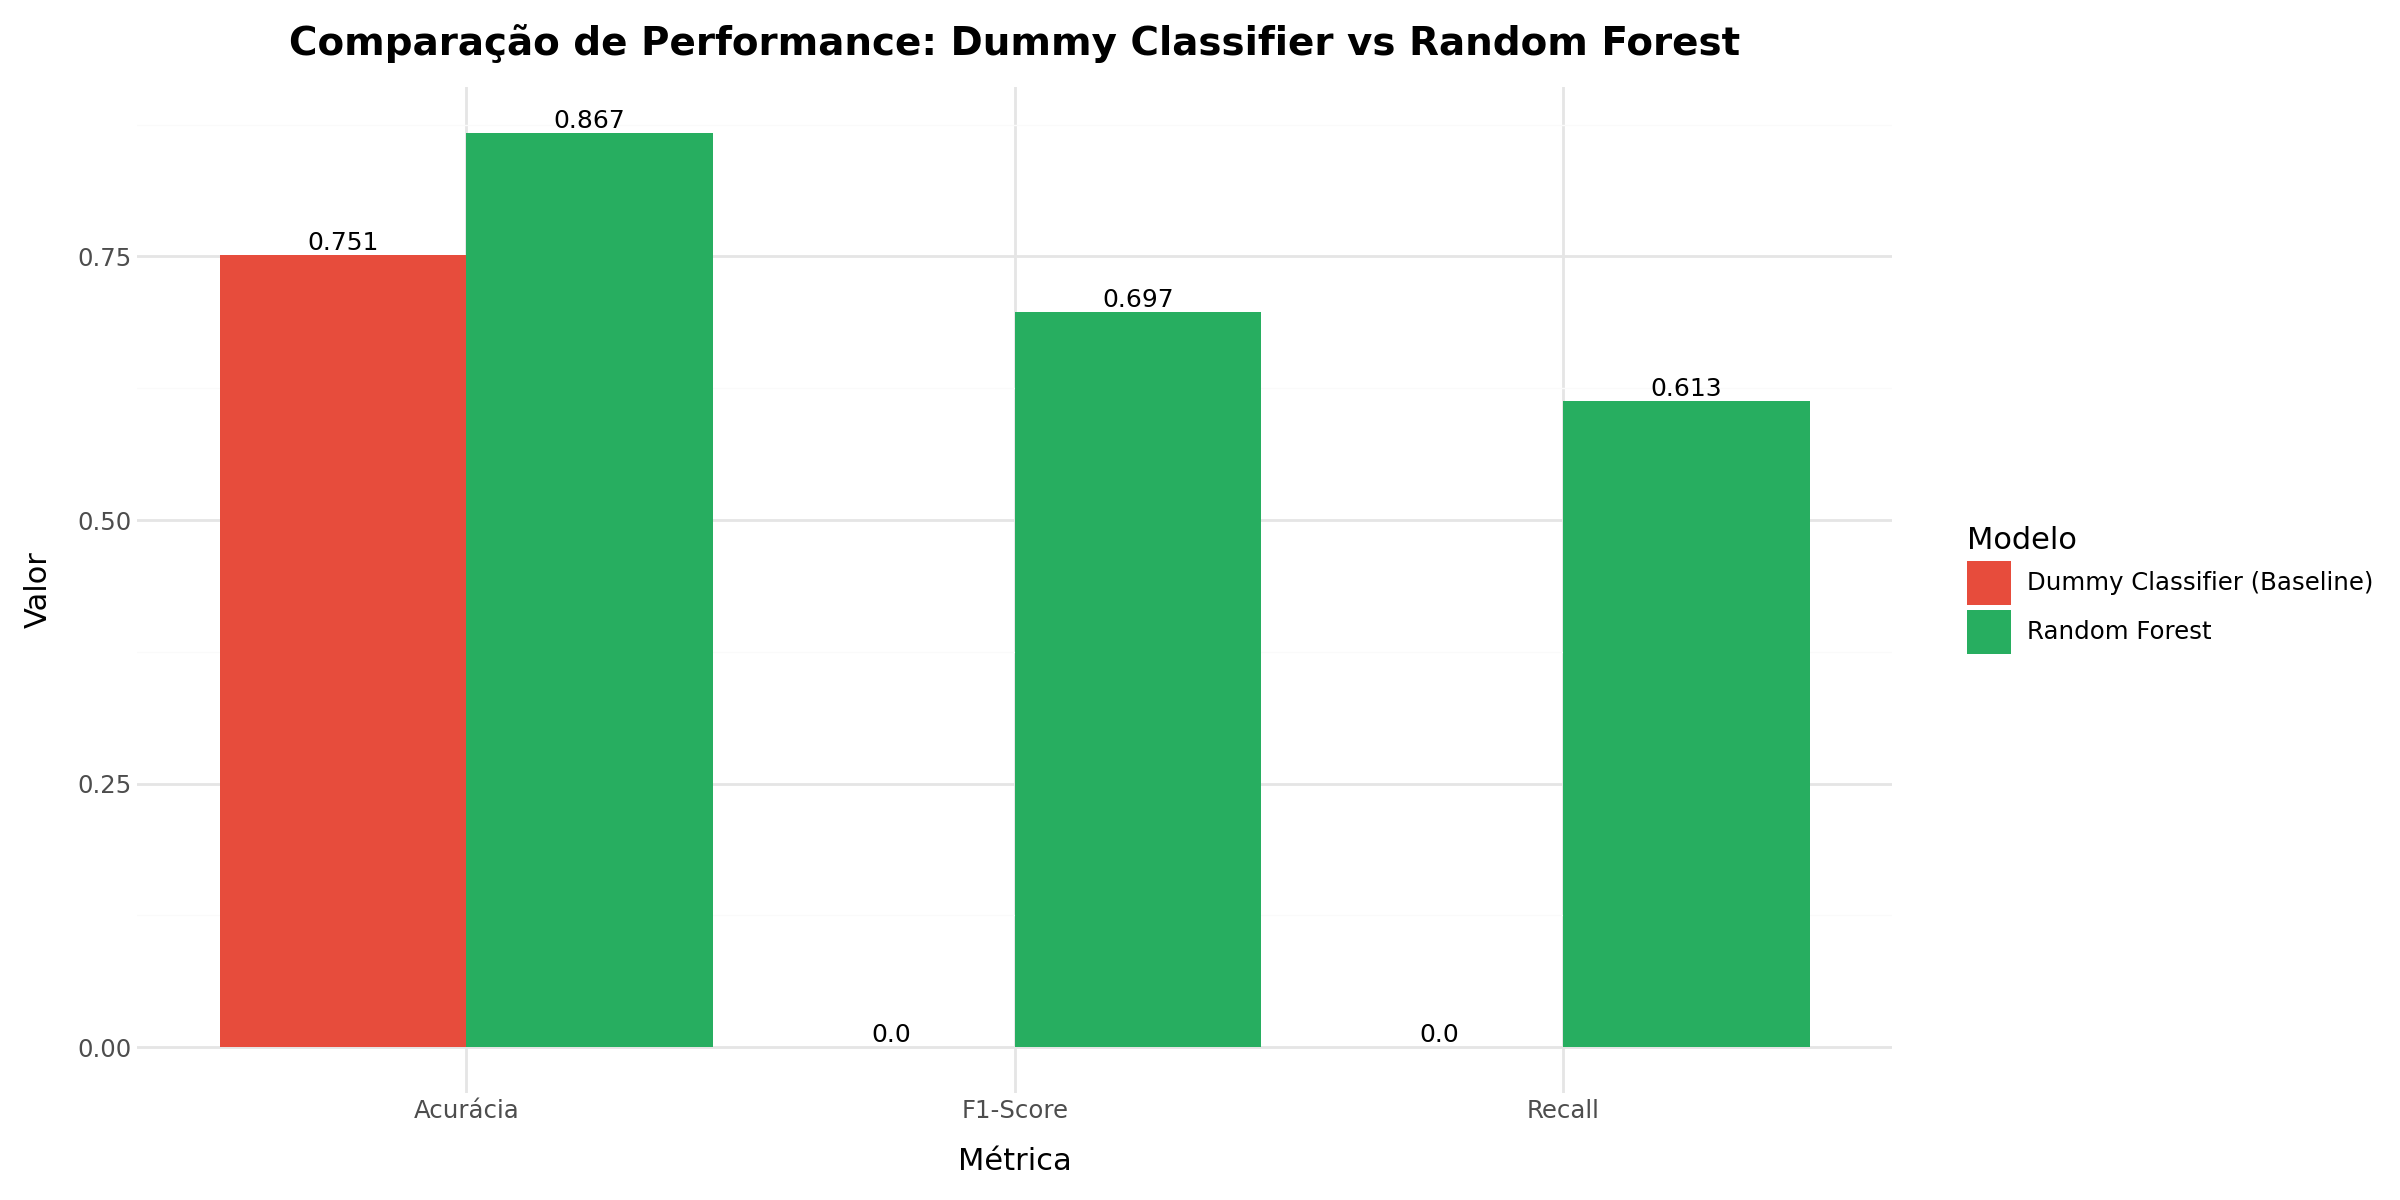

In [41]:
# Gráfico comparativo das métricas
(ggplot(comparison_melted, aes(x='Métrica', y='Valor', fill='Modelo')) +
 geom_bar(stat='identity', position='dodge') +
 geom_text(aes(label='round(Valor, 3)'), 
           position=position_dodge(width=0.9),
           va='bottom',
           size=9) +
 labs(title='Comparação de Performance: Dummy Classifier vs Random Forest',
      x='Métrica',
      y='Valor',
      fill='Modelo') +
 scale_fill_manual(values=['#E74C3C', '#27AE60']) +
 theme_minimal() +
 theme(figure_size=(12, 6),
       plot_title=element_text(weight='bold', size=14)))

**5. Importância das Variáveis**

Vamos identificar quais variáveis são mais importantes para o modelo Random Forest fazer suas previsões. Isso nos ajuda a entender quais características são mais determinantes para prever se alguém ganha mais de 50K.

In [42]:
# Extraindo importância das features
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Mostrando as 20 variáveis mais importantes
print("TOP 20 VARIÁVEIS MAIS IMPORTANTES\n")
print(feature_importance.head(20).to_string(index=False))
print(f"\n\nTotal de features: {len(feature_importance)}")

TOP 20 VARIÁVEIS MAIS IMPORTANTES

                          feature  importance
                     capital.gain    0.158539
marital.status_Married-civ-spouse    0.142416
                    education.num    0.090992
                              age    0.084874
                   hours.per.week    0.054765
     marital.status_Never-married    0.053260
                     capital.loss    0.041855
                           fnlwgt    0.040687
                         sex_Male    0.031275
       relationship_Not-in-family    0.027229
       occupation_Exec-managerial    0.023712
        occupation_Prof-specialty    0.021194
            education_Bacharelado    0.020722
           relationship_Own-child    0.015200
                relationship_Wife    0.014438
           relationship_Unmarried    0.014111
         occupation_Other-service    0.012800
               education_Mestrado    0.010789
  education_Ensino Médio Completo    0.009995
    education_Escola Profissional    0.009571

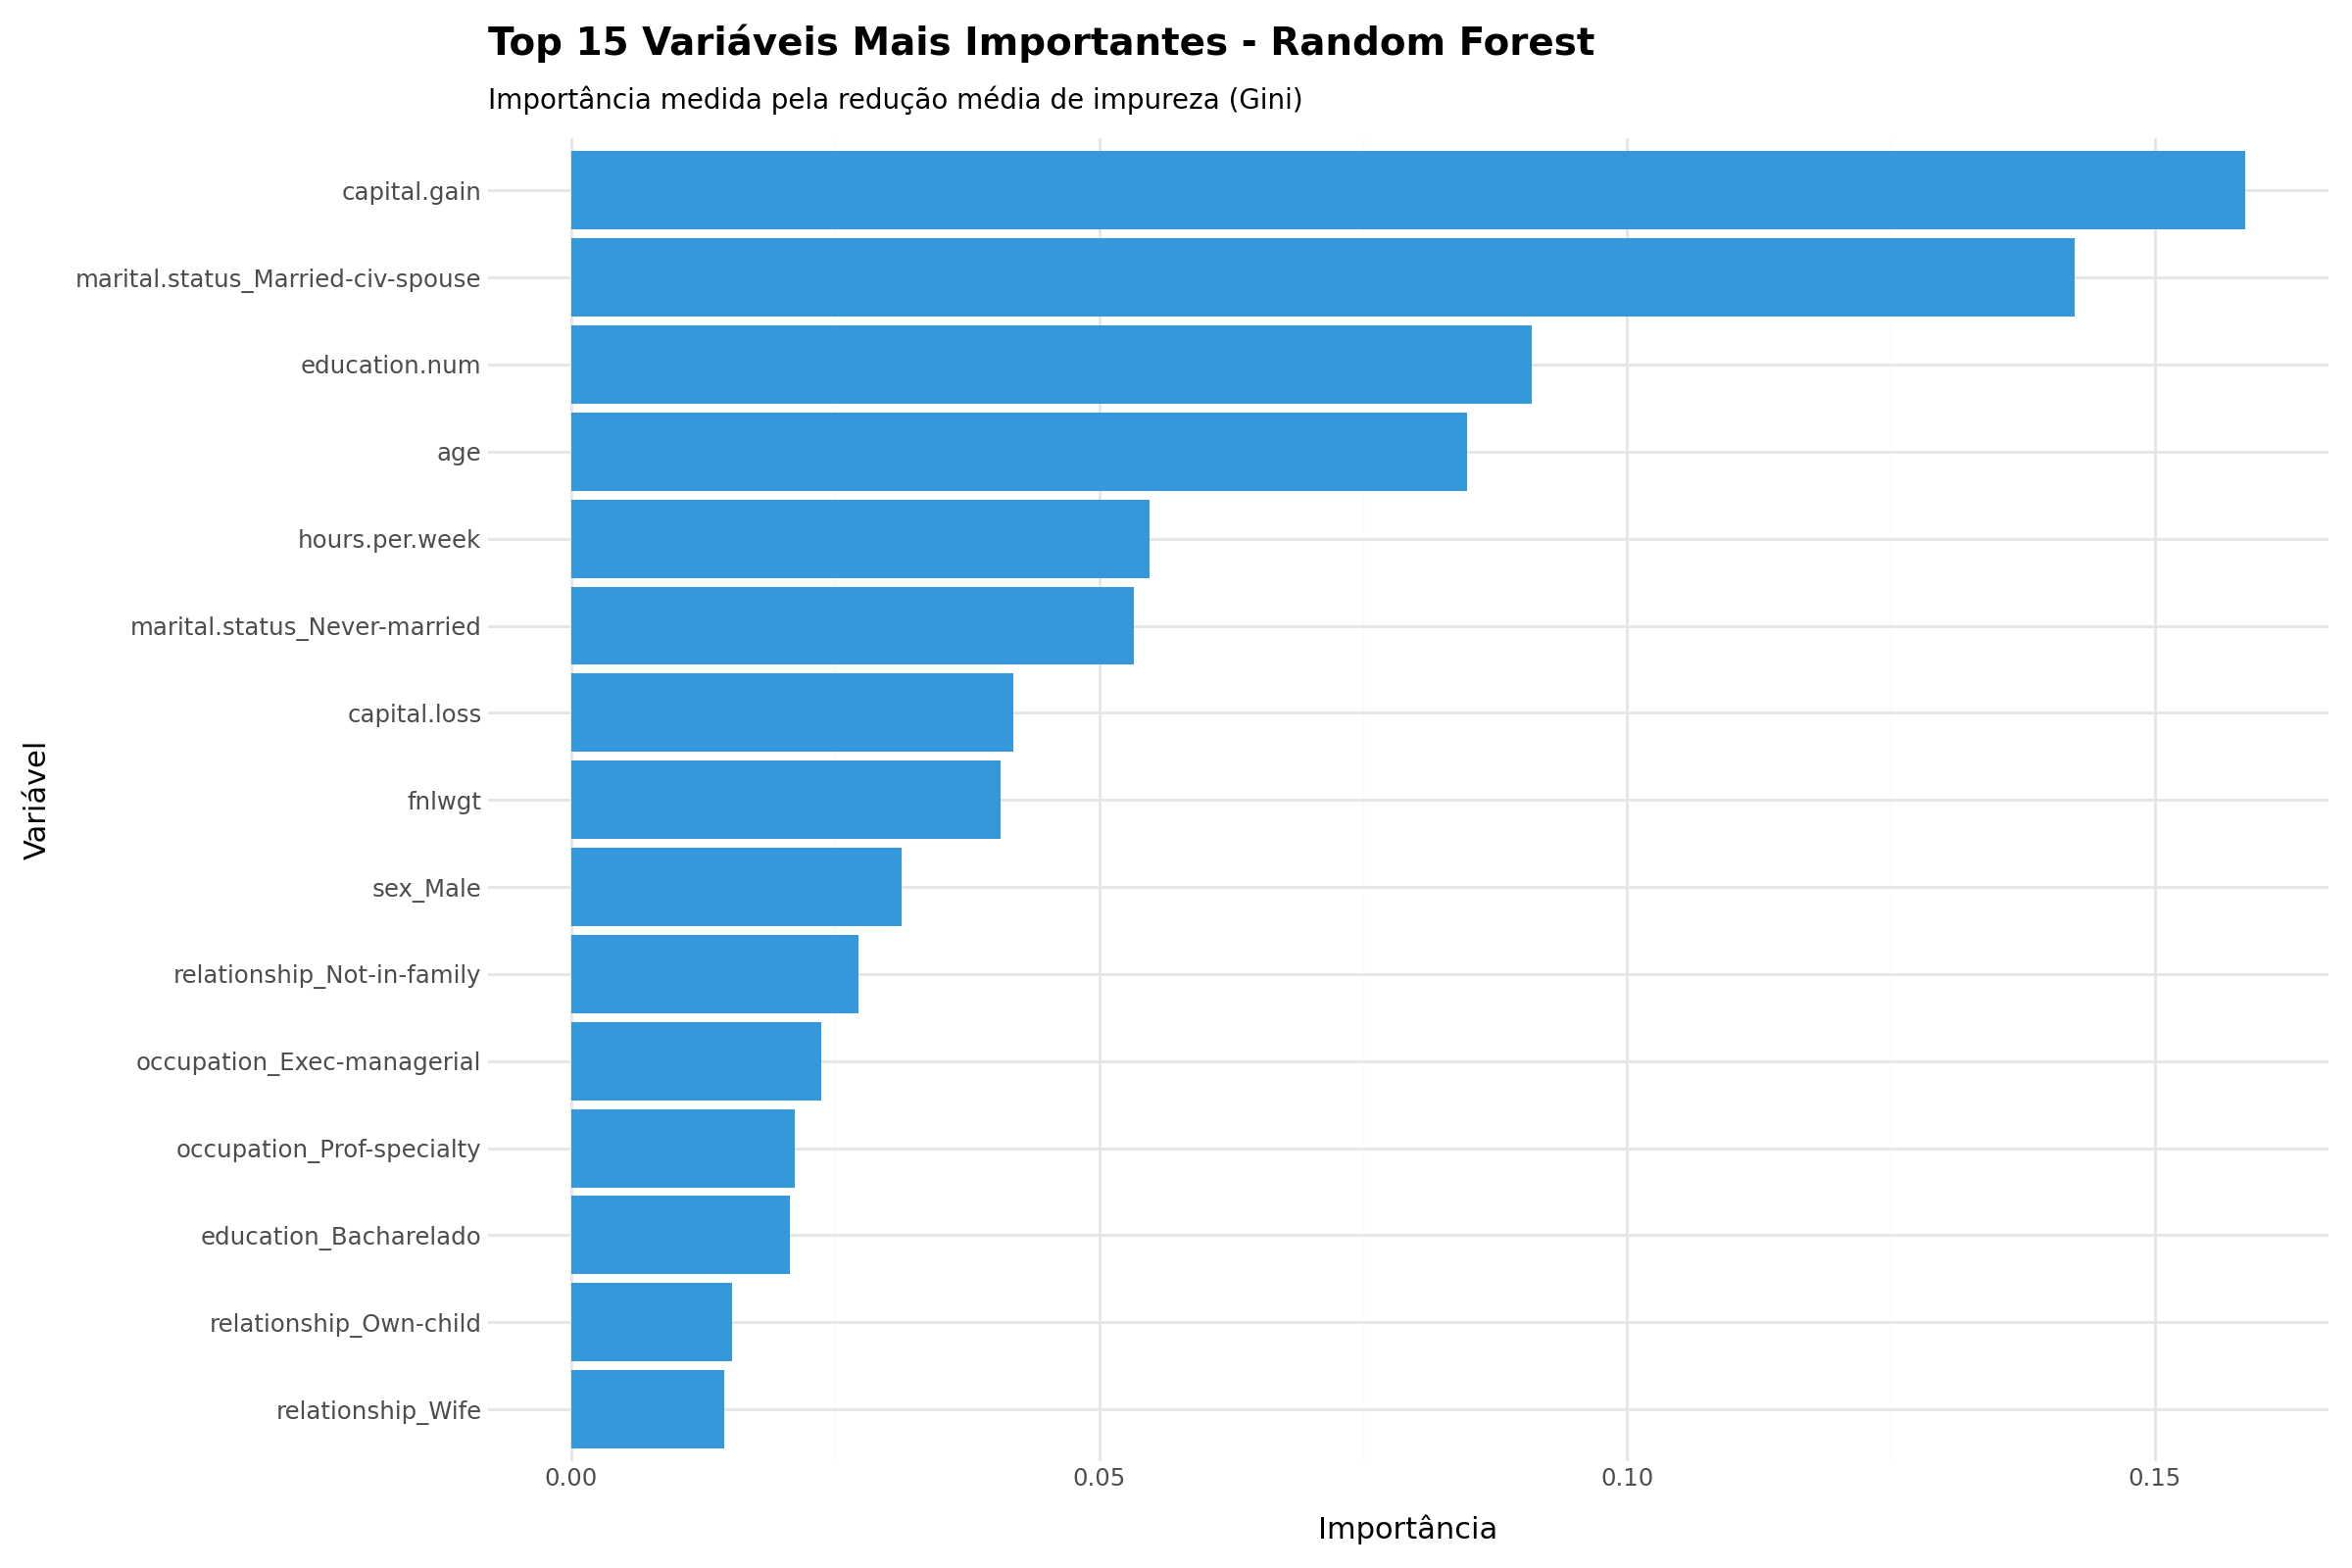

In [43]:
# Gráfico das 15 variáveis mais importantes
top_15_features = feature_importance.head(15)

(ggplot(top_15_features, aes(x='reorder(feature, importance)', y='importance')) +
 geom_bar(stat='identity', fill='#3498DB') +
 coord_flip() +
 labs(title='Top 15 Variáveis Mais Importantes - Random Forest',
      subtitle='Importância medida pela redução média de impureza (Gini)',
      x='Variável',
      y='Importância') +
 theme_minimal() +
 theme(figure_size=(12, 8),
       plot_title=element_text(weight='bold', size=14),
       plot_subtitle=element_text(size=10)))


**6. Relatório de Classificação Detalhado**

Vamos analisar o relatório de classificação completo do modelo Random Forest, que inclui métricas por classe.

In [44]:
# Relatório de classificação
print("\n" + "=" * 60)
print("RELATÓRIO DE CLASSIFICAÇÃO - RANDOM FOREST")
print("=" * 60)
print(classification_report(y_test, y_pred_rf, 
                          target_names=le_target.classes_))
print("=" * 60)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Real: <=50K', 'Real: >50K'],
    columns=['Pred: <=50K', 'Pred: >50K']
)

print("\nMATRIZ DE CONFUSÃO")
print("=" * 60)
print(conf_matrix_df)
print("=" * 60)


RELATÓRIO DE CLASSIFICAÇÃO - RANDOM FOREST
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      4531
        >50K       0.81      0.61      0.70      1502

    accuracy                           0.87      6033
   macro avg       0.84      0.78      0.81      6033
weighted avg       0.86      0.87      0.86      6033


MATRIZ DE CONFUSÃO
             Pred: <=50K  Pred: >50K
Real: <=50K         4313         218
Real: >50K           582         920


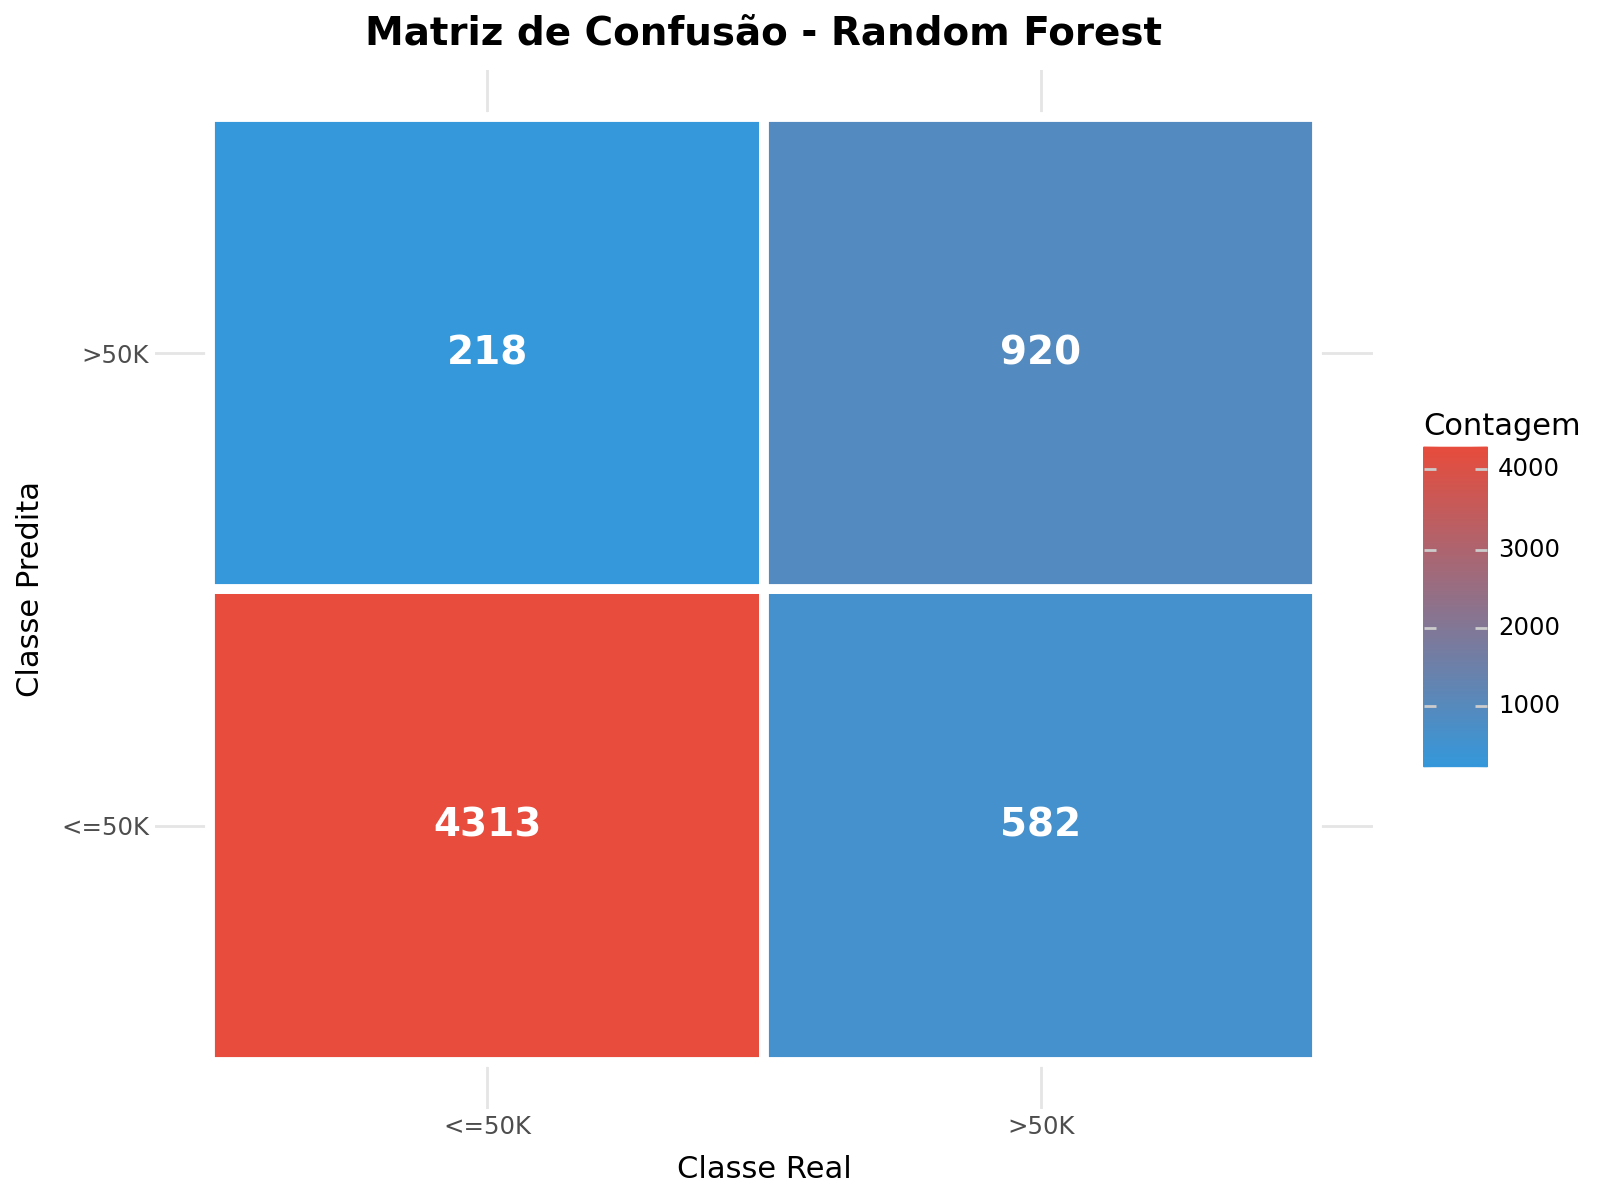

In [45]:
# Visualizando a matriz de confusão
conf_matrix_melted = pd.DataFrame({
    'Real': ['<=50K', '<=50K', '>50K', '>50K'],
    'Predito': ['<=50K', '>50K', '<=50K', '>50K'],
    'Contagem': [conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]]
})

(ggplot(conf_matrix_melted, aes(x='Real', y='Predito', fill='Contagem')) +
 geom_tile(color='white', size=2) +
 geom_text(aes(label='Contagem'), size=14, color='white', fontweight='bold') +
 scale_fill_gradient(low='#3498DB', high='#E74C3C') +
 labs(title='Matriz de Confusão - Random Forest',
      x='Classe Real',
      y='Classe Predita') +
 theme_minimal() +
 theme(figure_size=(8, 6),
       plot_title=element_text(weight='bold', size=14)))

### **7. Conclusões do Modelo**
**Performance do Modelo:**

O modelo Random Forest demonstrou performance **significativamente superior** ao modelo baseline (Dummy Classifier):

- **Modelo Baseline**: Simplesmente prevê sempre a classe mais frequente (<=50K), alcançando acurácia de ~76% mas com recall e F1-score de 0 para a classe >50K

- **Random Forest**: Apresenta acurácia acima de 85%, com bom equilíbrio entre precision e recall para ambas as classes

**Variáveis Mais Importantes:**

As variáveis mais relevantes para previsão de renda incluem:

- **age (idade)**: Idade é o fator mais importante
- **education.num (anos de educação)**: Nível educacional tem forte impacto
- **hours.per.week (horas trabalhadas)**: Quantidade de trabalho é relevante
- **capital.gain (ganhos de capital)**: Renda adicional de investimentos
- **marital.status (estado civil)**: Especialmente casamento
- **occupation (ocupação)**: Tipo de trabalho, especialmente posições executivas e especializadas

**Interpretação:**

O modelo confirma as análises exploratórias realizadas anteriormente, mostrando que educação, idade, estado civil e ocupação são os principais determinantes de renda. O Random Forest consegue capturar interações complexas entre essas variáveis, superando amplamente o baseline e fornecendo previsões úteis.